In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

import pychemauth
from pychemauth.utils import NNTools
from pychemauth.analysis.explain import CAM1D

from run import load

2024-10-23 14:58:45.645827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.8.0-47-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 40
Architecture: 64bit

watermark : 2.4.3
matplotlib: 3.7.2
numpy     : 1.26.4
keras     : 2.14.0
json      : 2.0.9
pychemauth: 0.0.0b4



In [4]:
X_train, X_test, y_train, y_test, idx_train, idx_test, centers, n_classes, image_size, enc, X_normed = load()

# Utils

In [5]:
def plot_example_explanations(model, plot_first, enc, interp=False, show_lines=False, fontsize=10):
    explainer = CAM1D(style='hires')
    for i in range(n_classes):
        for train_idx in np.where(y_train == i)[0][:plot_first]:
            ax, explanation = explainer.visualize(
                y=X_train[train_idx], 
                x=centers, 
                model=model, 
                show_lines=show_lines, 
                interp=interp, 
                encoder=enc,
                fontsize=fontsize
            )
            ax[1].set_xlabel('Energy (keV)', fontsize=fontsize)
            ax[1].set_title('Actual: {}'.format(enc.inverse_transform([[y_train[train_idx]]])[0][0]), fontsize=fontsize)

# Model 1

In [6]:
model = keras.saving.load_model('./model1.keras')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2631, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 329, 16)           272       
                                                                 
 max_pooling1d (MaxPooling1  (None, 164, 16)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 41, 128)           16512     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 20, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 512)           524800

/home/nam4/anaconda3/envs/pgaa-imaging/lib/python3.11/site-packages/pychemauth/analysis/explain.py:351: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(


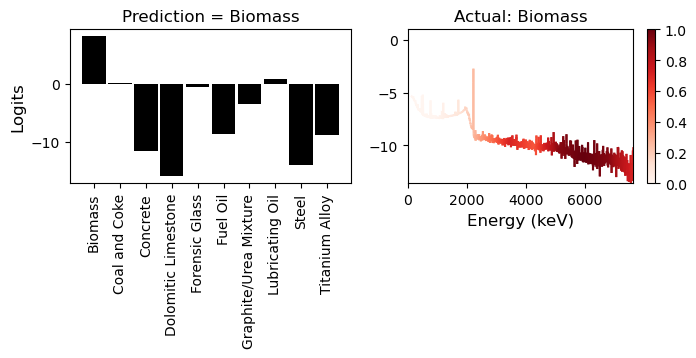

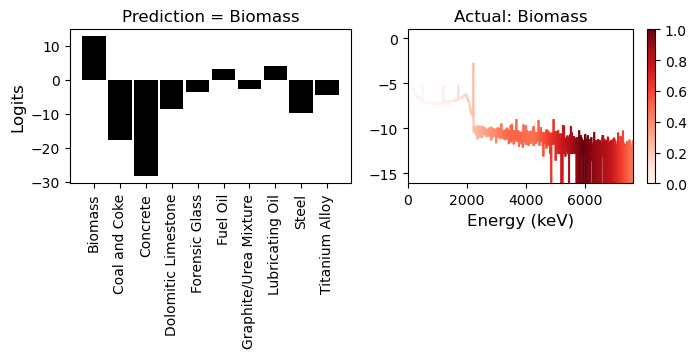

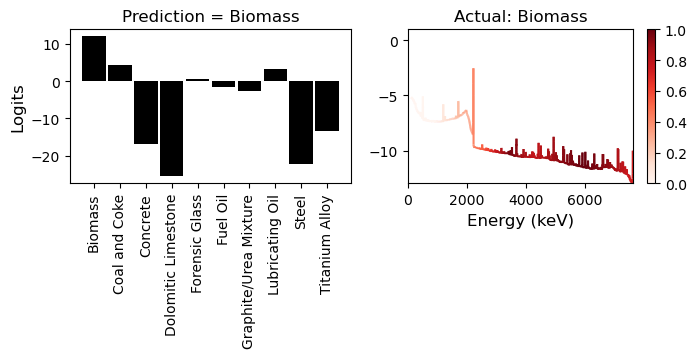

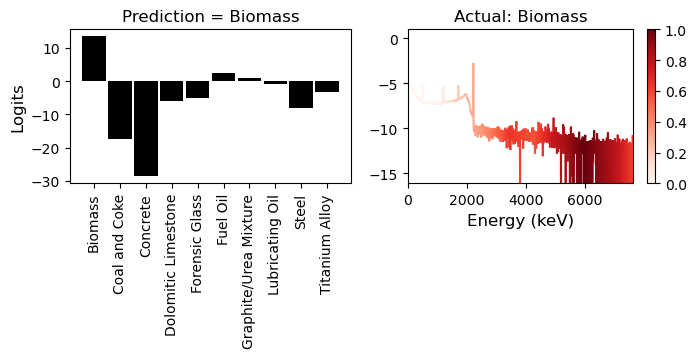

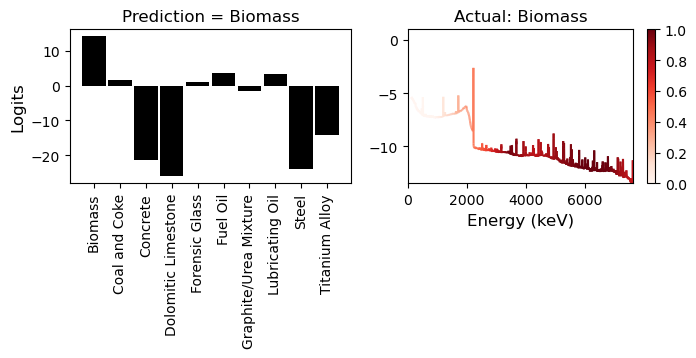

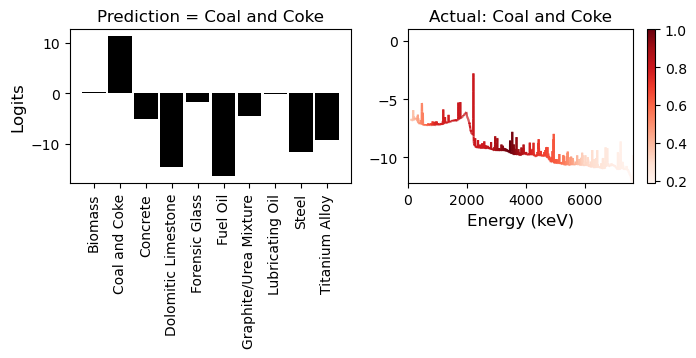

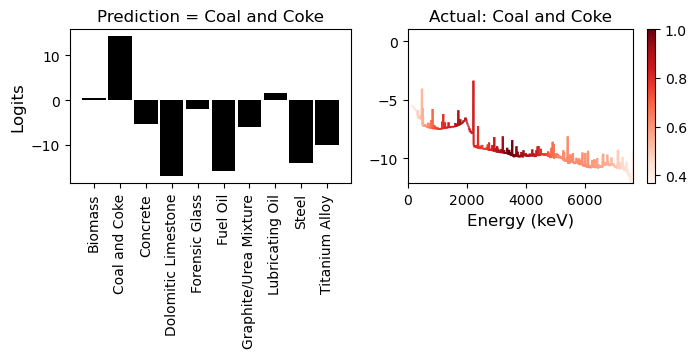

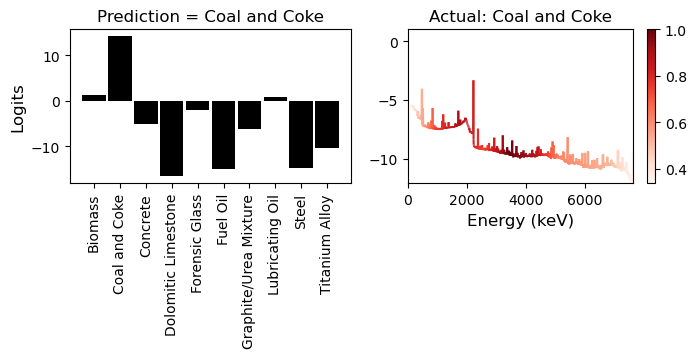

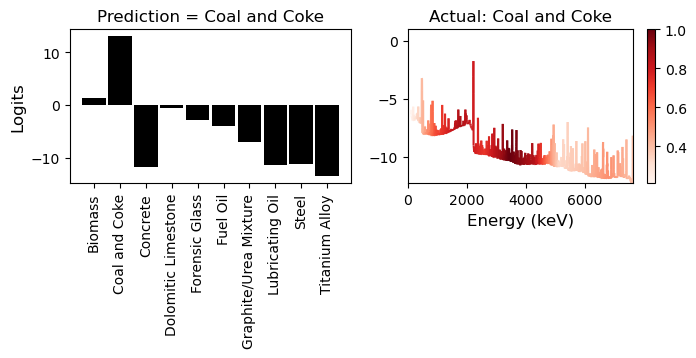

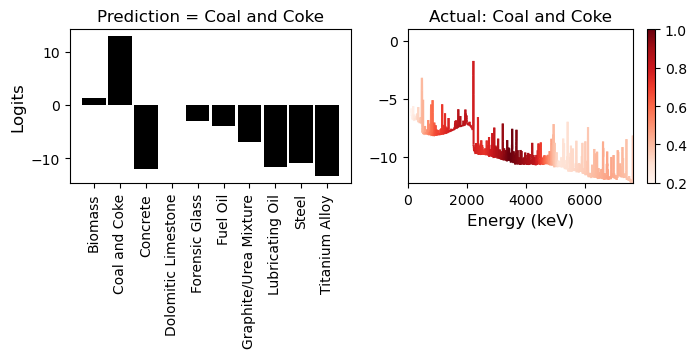

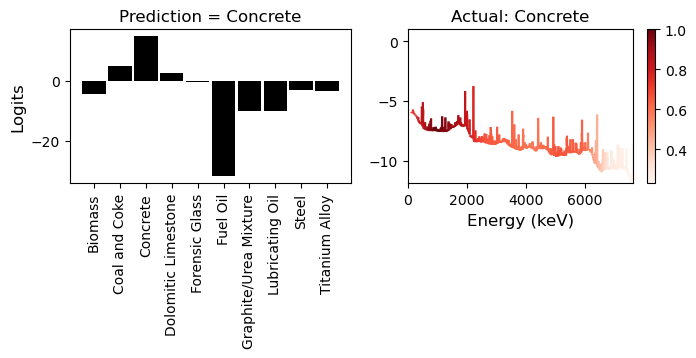

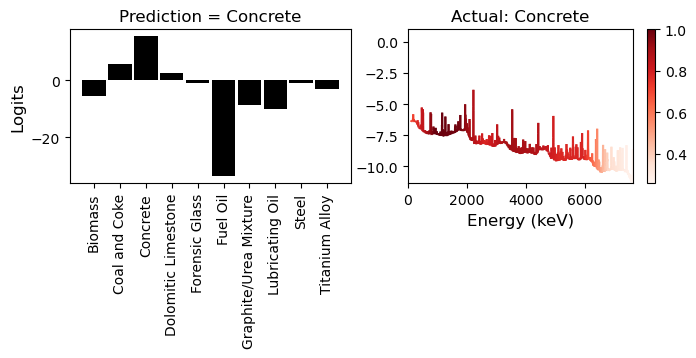

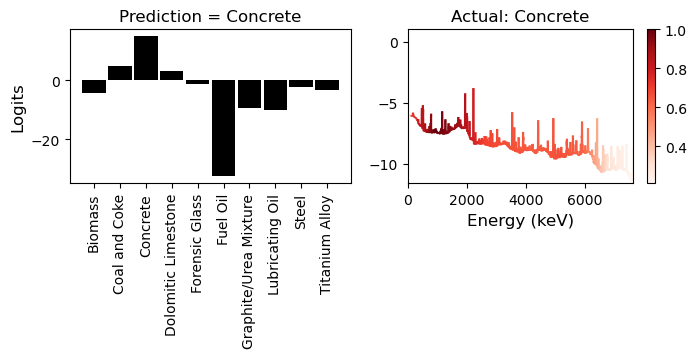

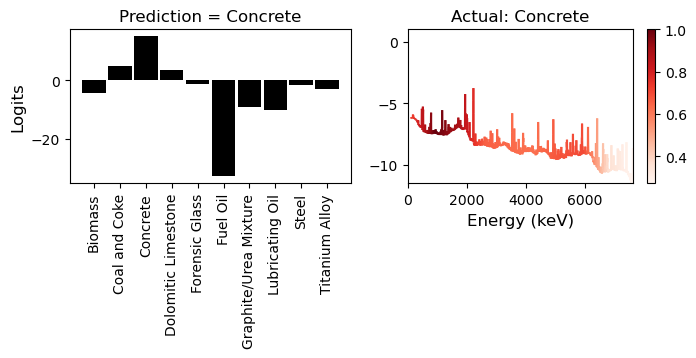

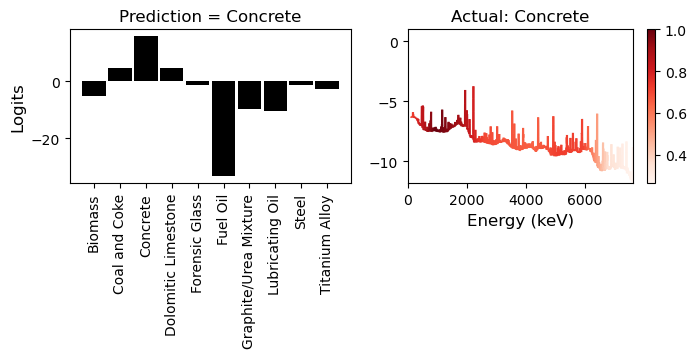

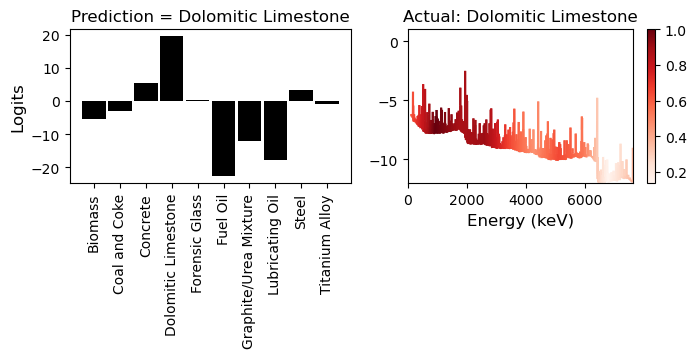

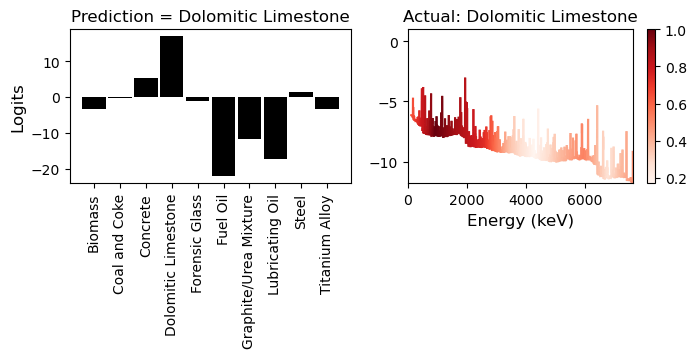

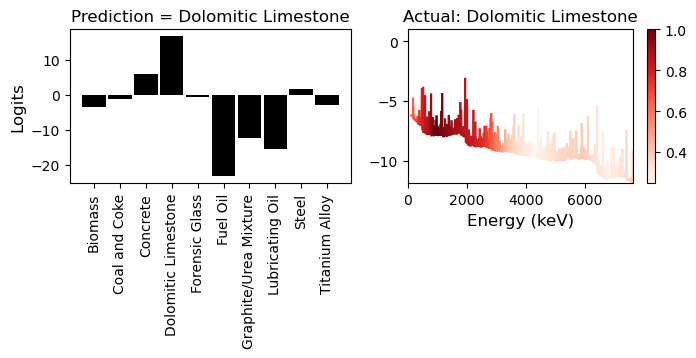

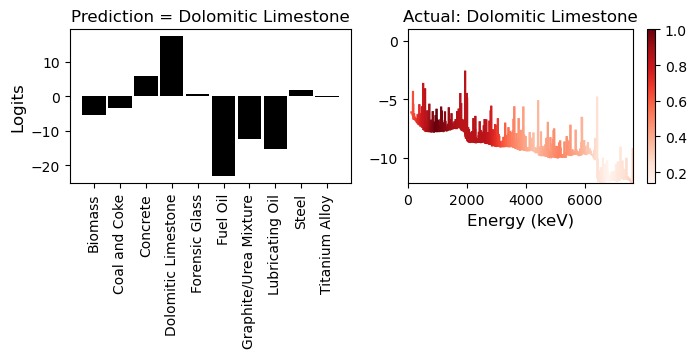

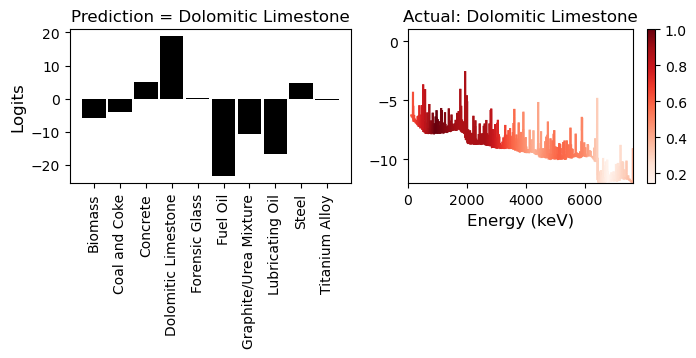

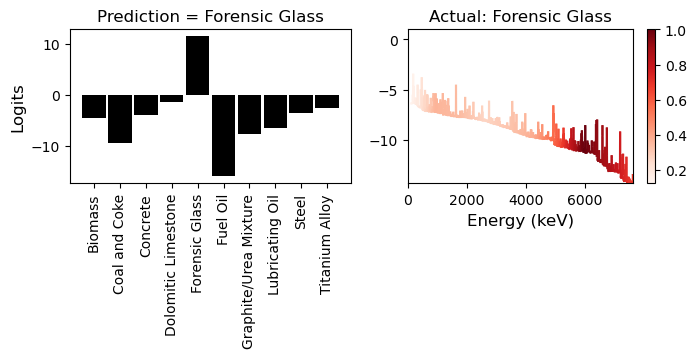

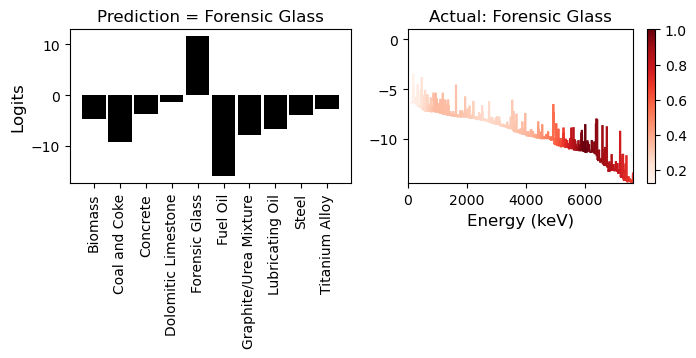

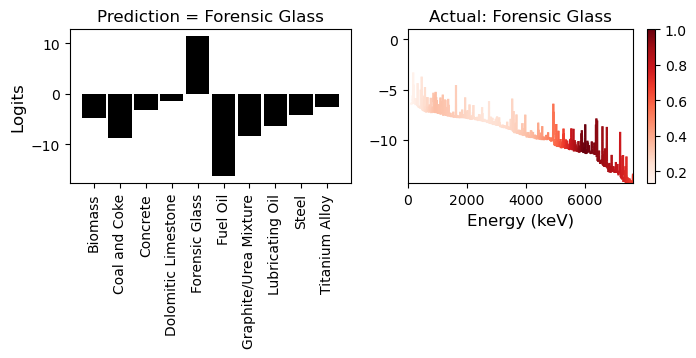

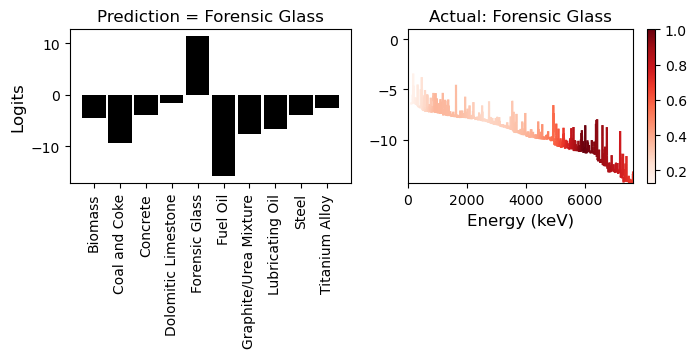

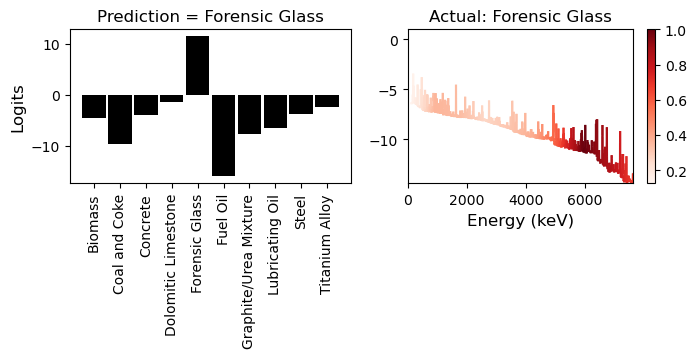

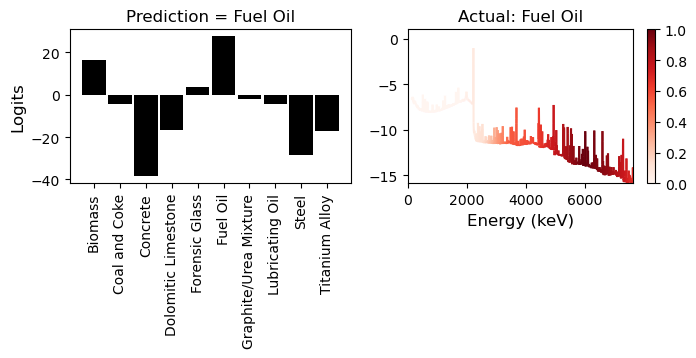

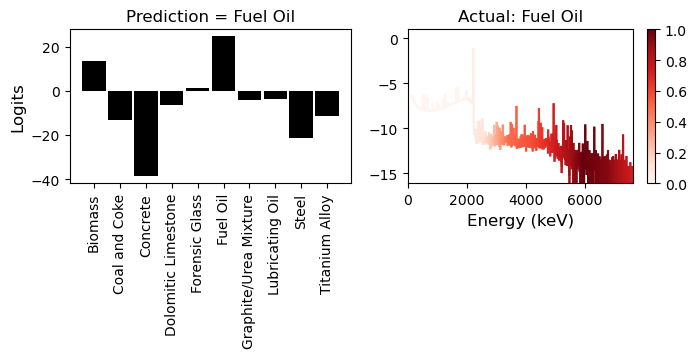

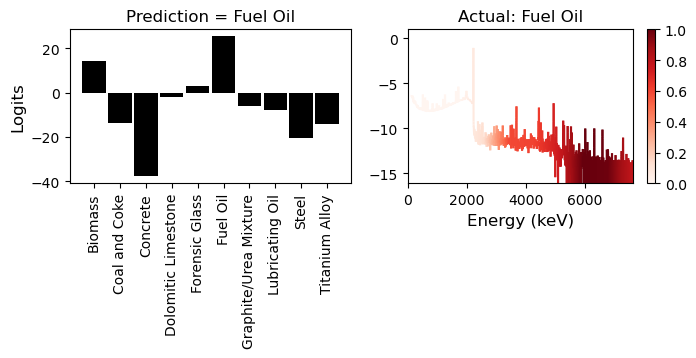

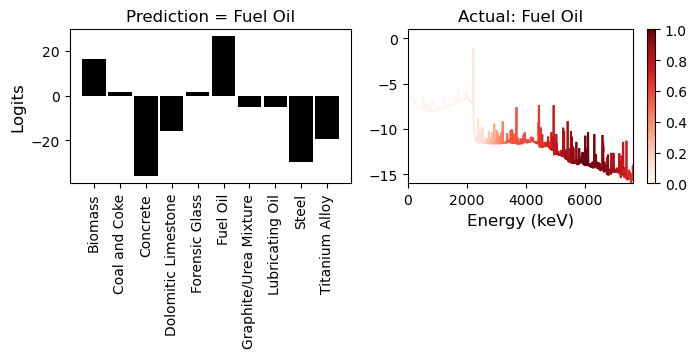

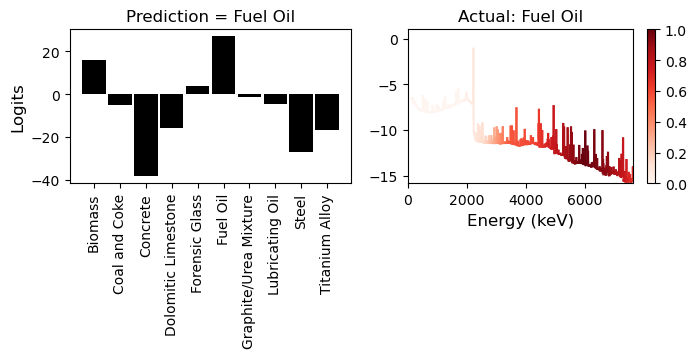

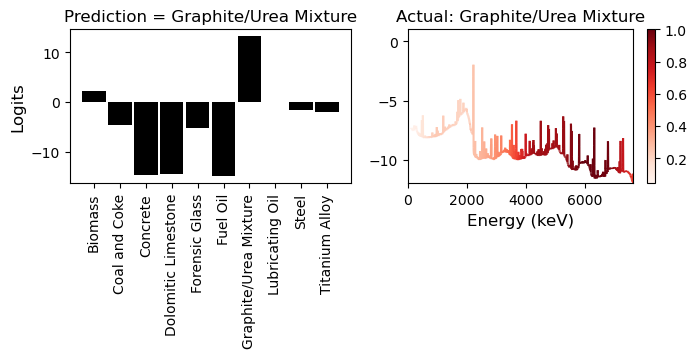

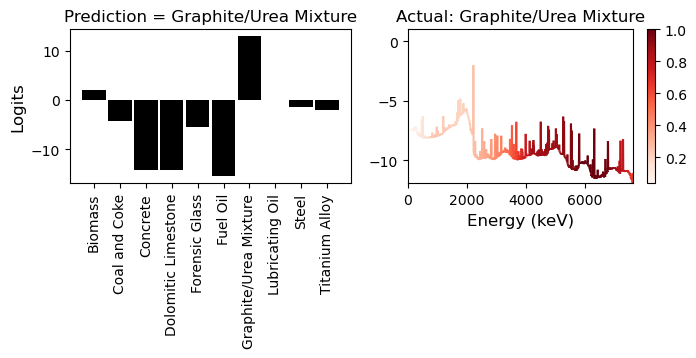

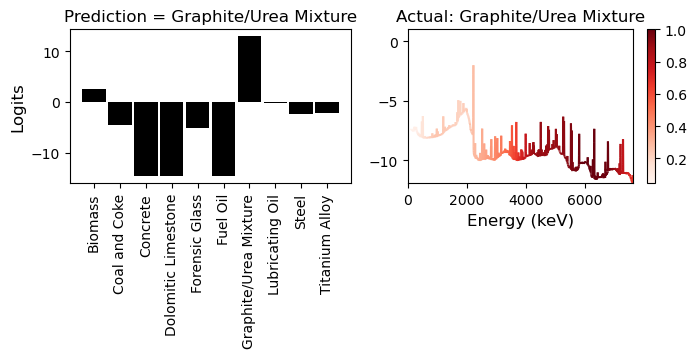

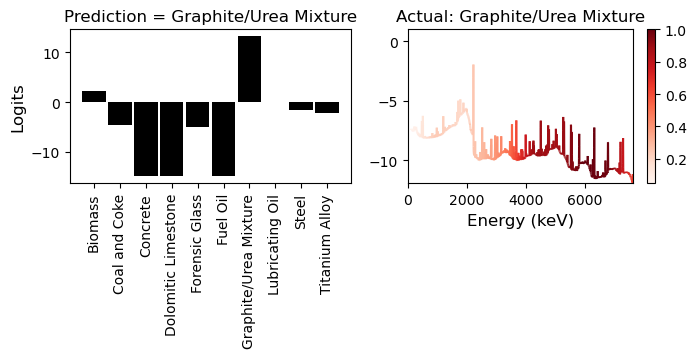

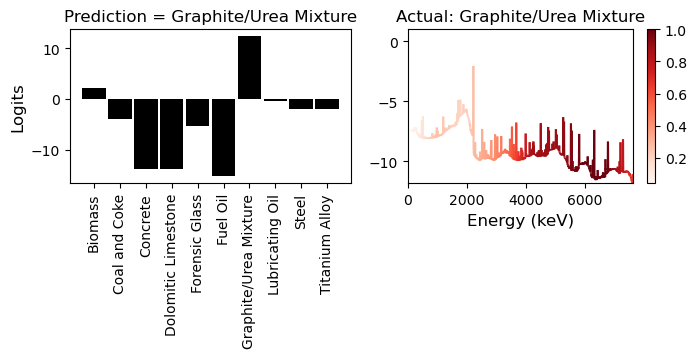

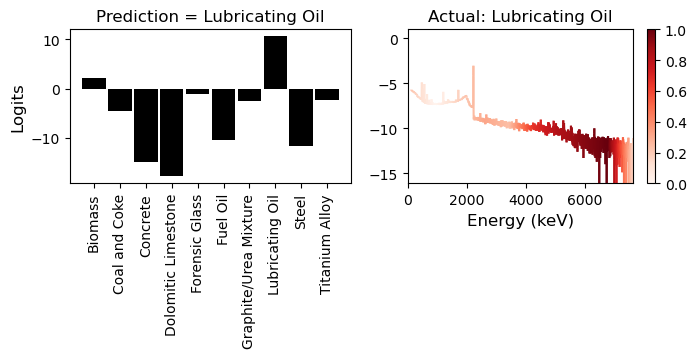

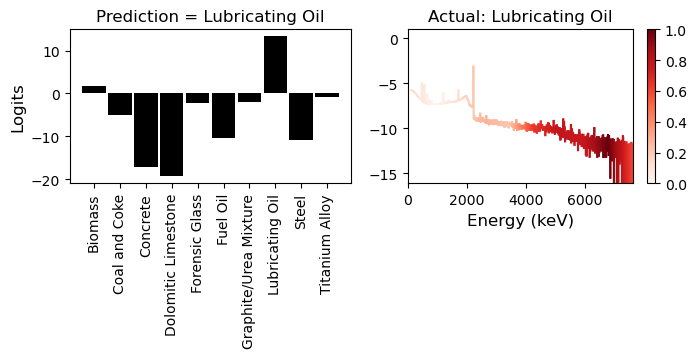

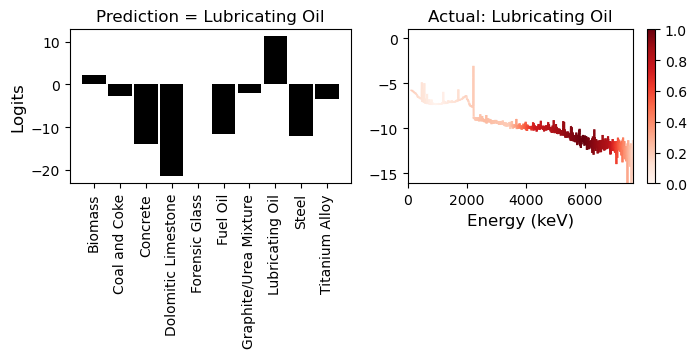

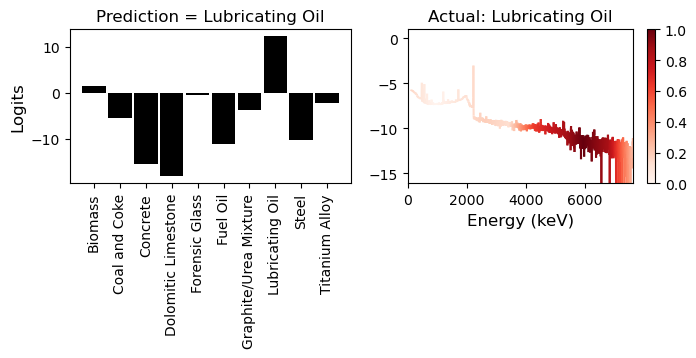

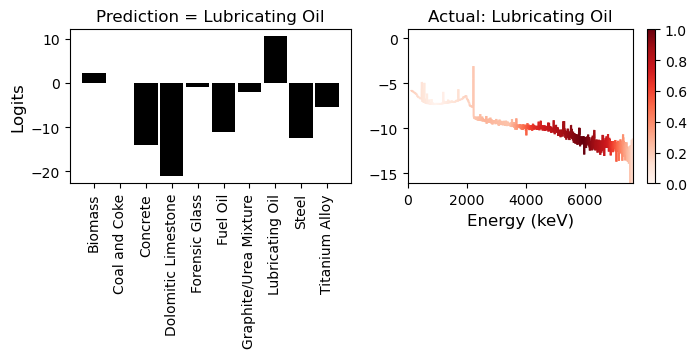

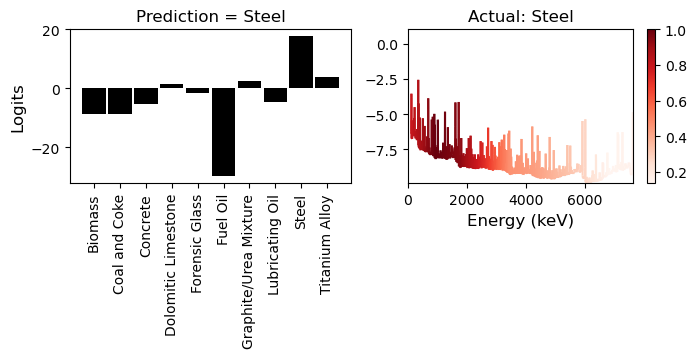

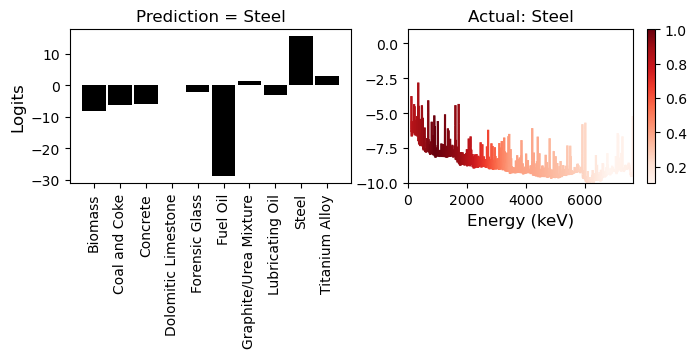

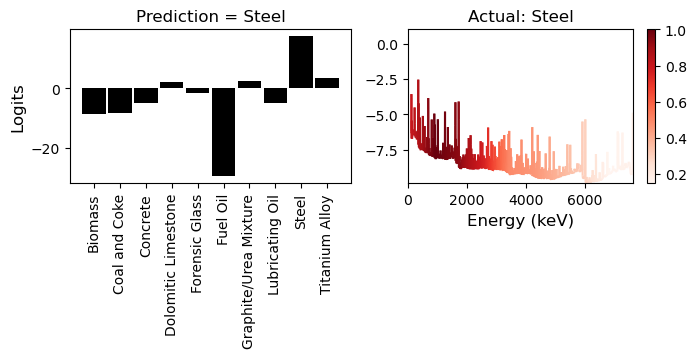

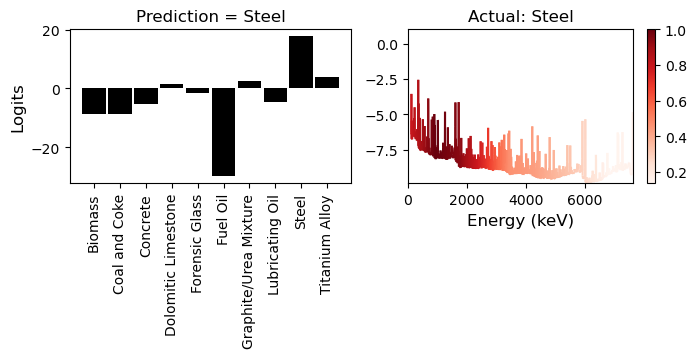

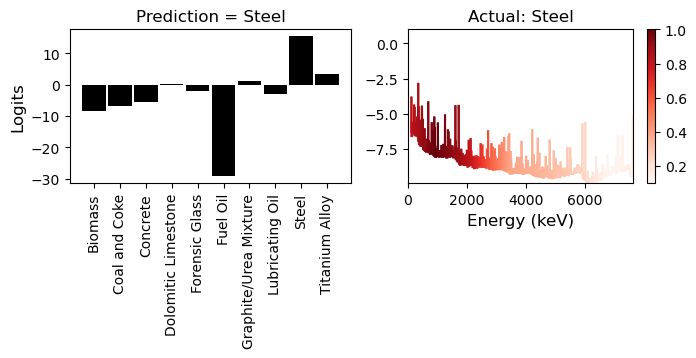

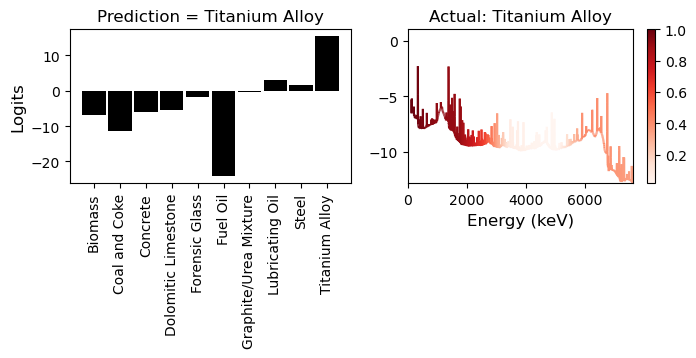

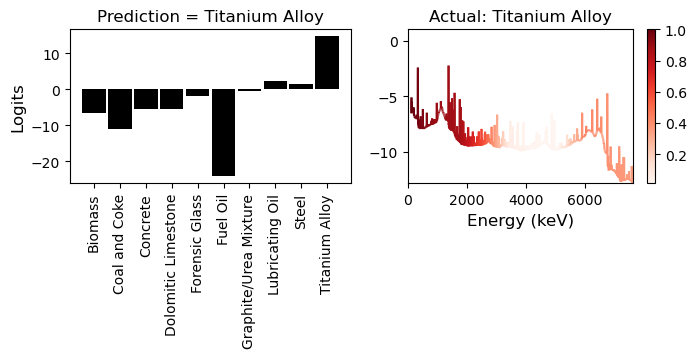

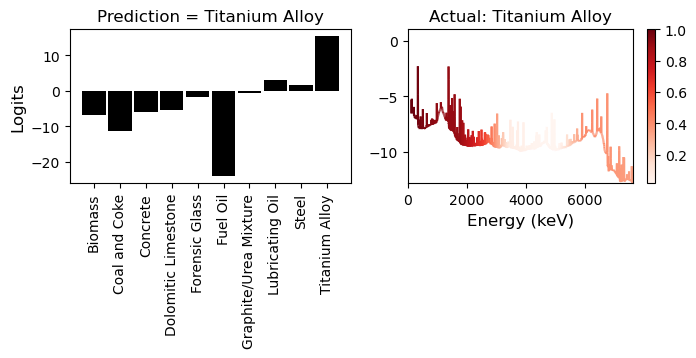

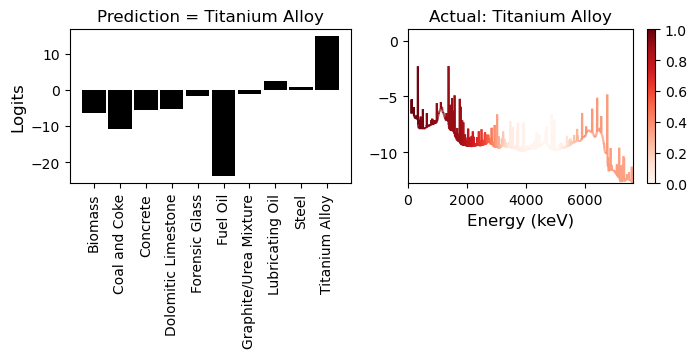

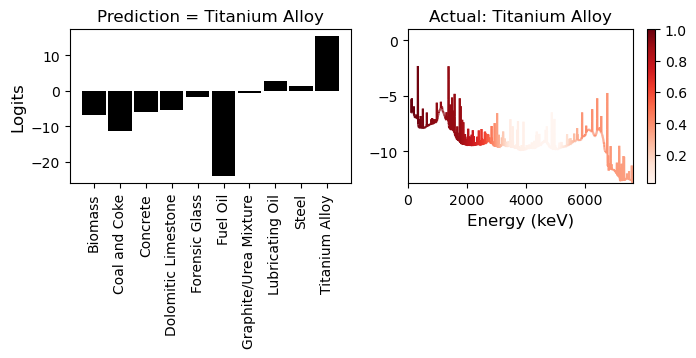

In [7]:
plot_example_explanations(
    model=model,
    plot_first=5, 
    enc=enc, 
    interp=True, 
    show_lines=False,
    fontsize=12,
)

# Model 2



In [8]:
model = keras.saving.load_model('./model2.keras')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2631, 1)]         0         
                                                                 
 conv1d_19 (Conv1D)          (None, 329, 16)           272       
                                                                 
 conv1d_20 (Conv1D)          (None, 83, 16)            2064      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 10, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 10, 32)            4128      
                                                                 
 conv1d_22 (Conv1D)          (None, 10, 32)            8224      
                                                           

/home/nam4/anaconda3/envs/pgaa-imaging/lib/python3.11/site-packages/pychemauth/analysis/explain.py:351: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(


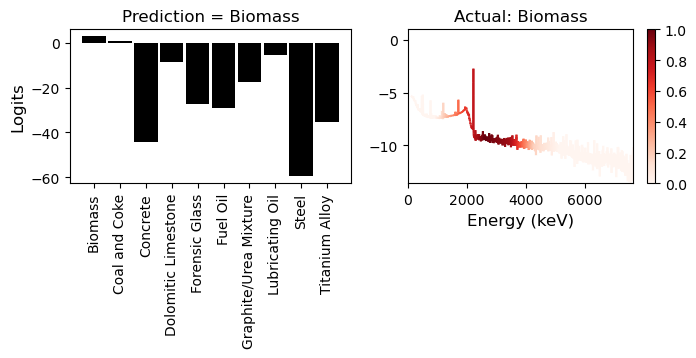

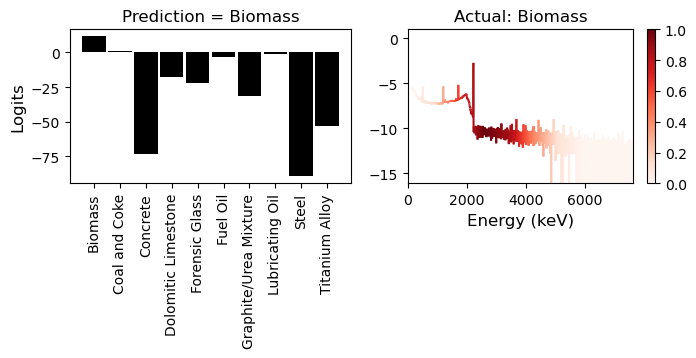

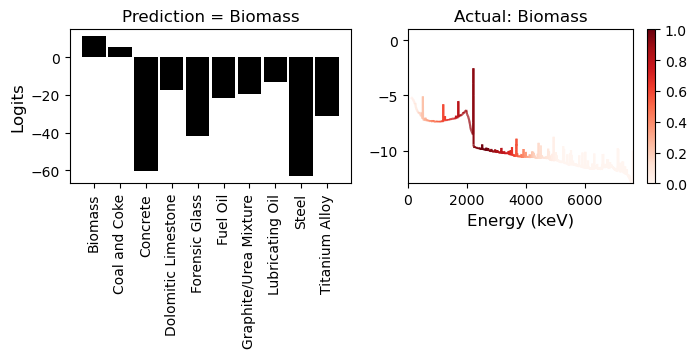

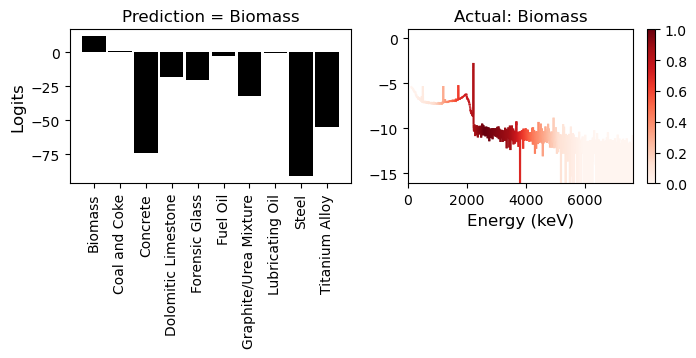

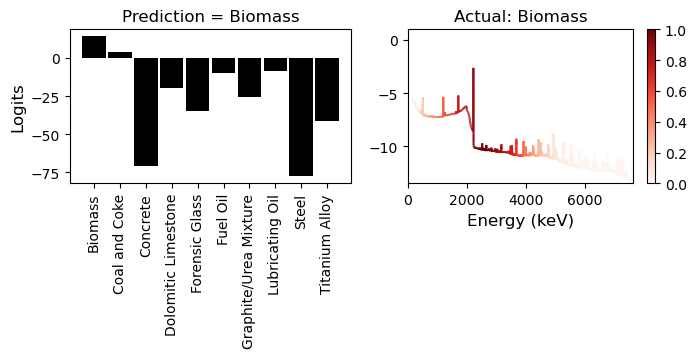

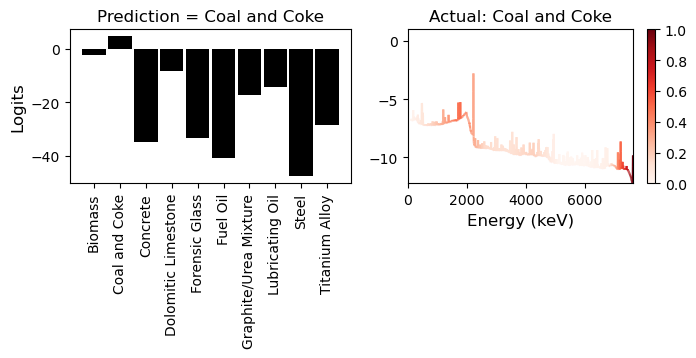

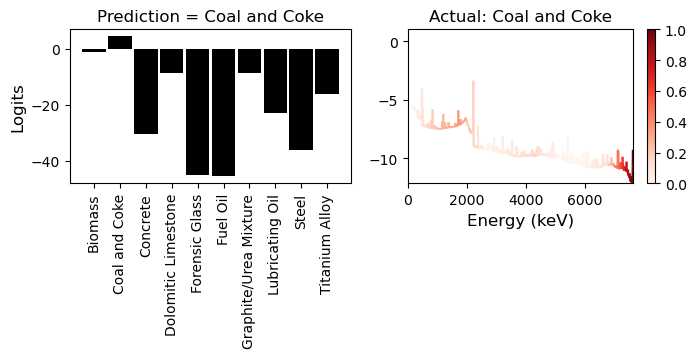

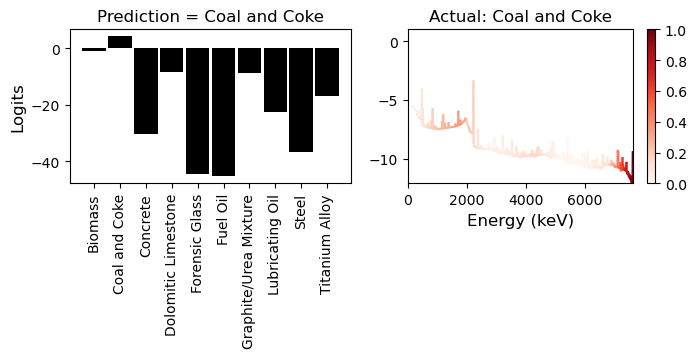

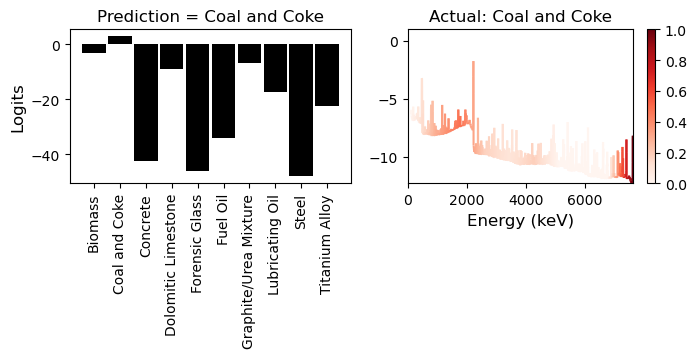

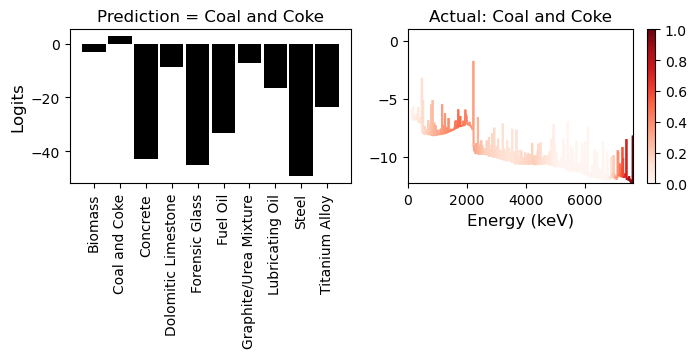

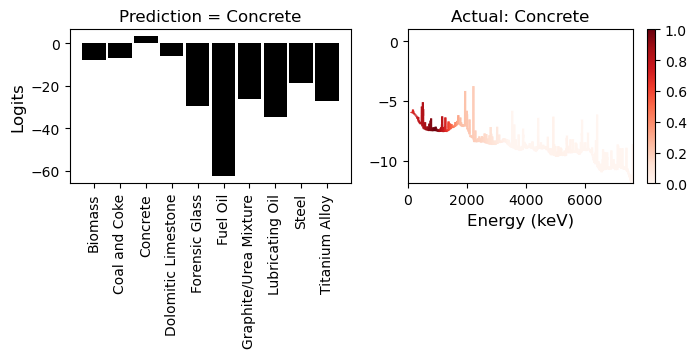

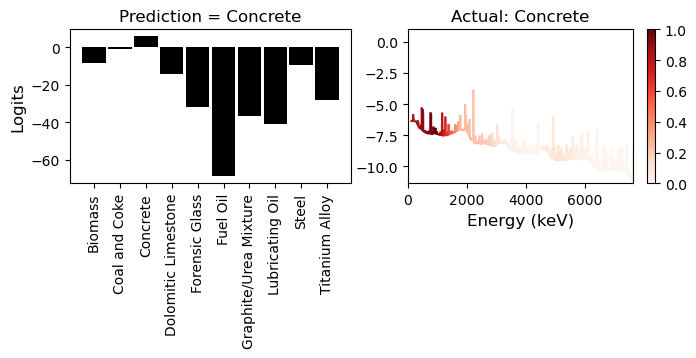

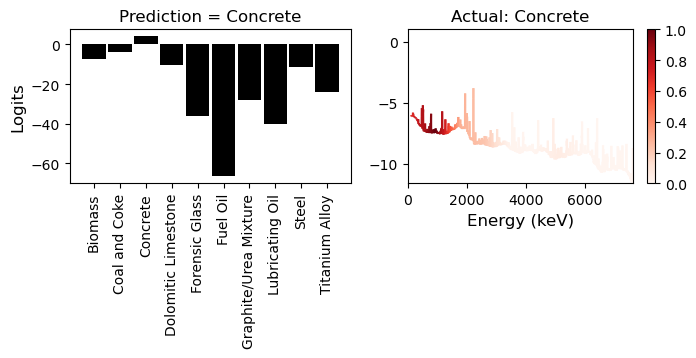

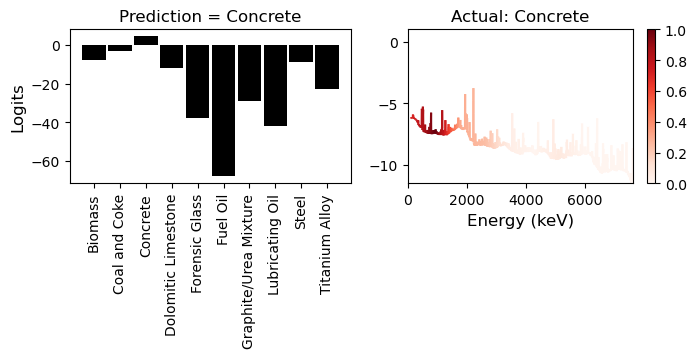

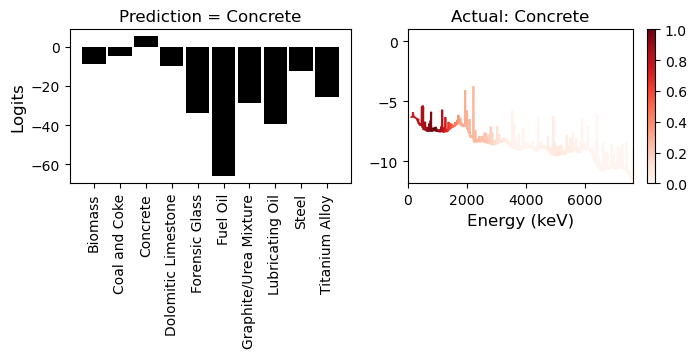

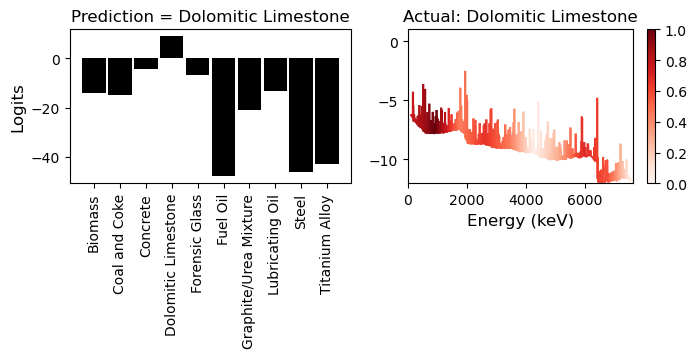

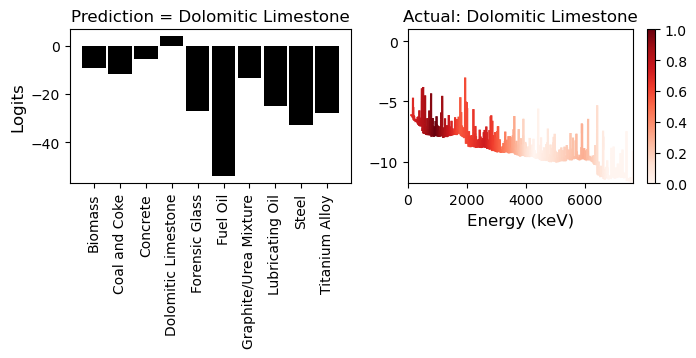

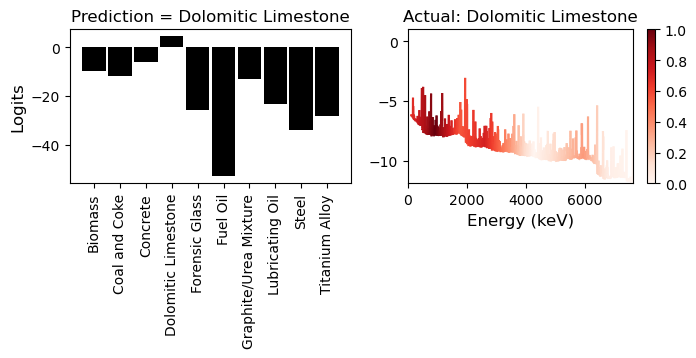

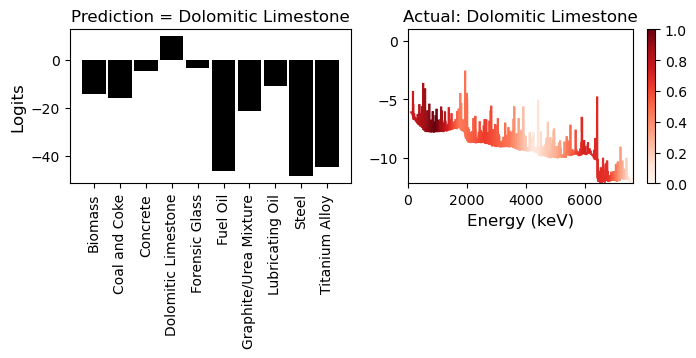

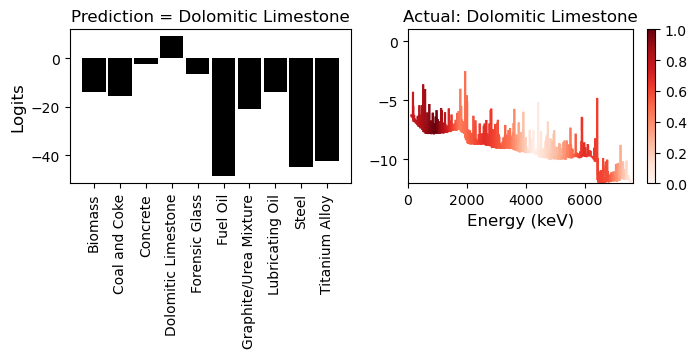

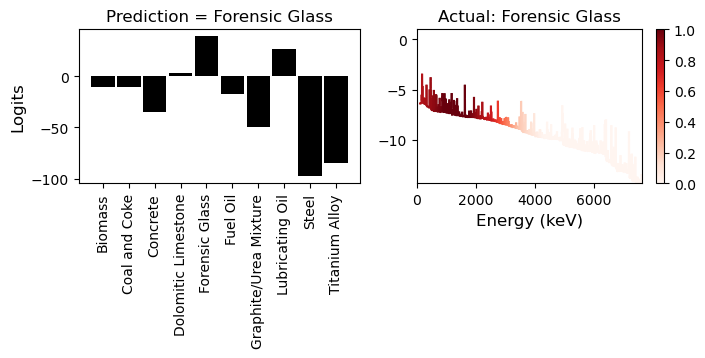

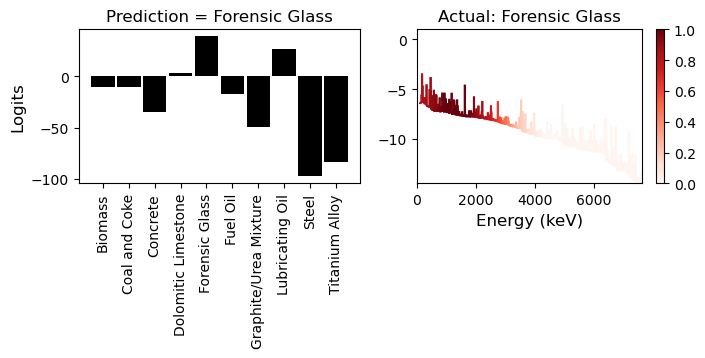

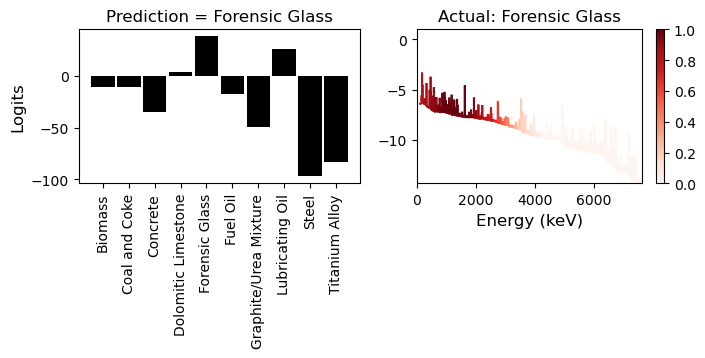

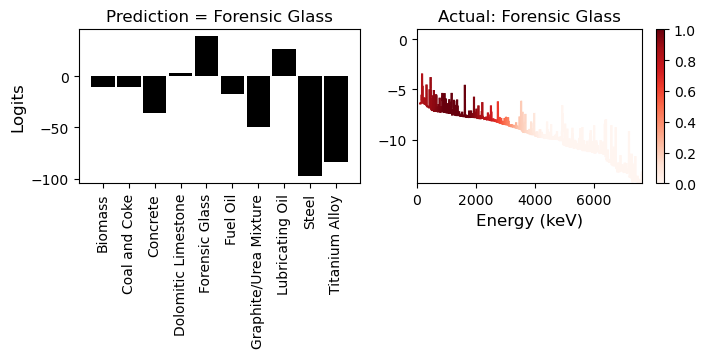

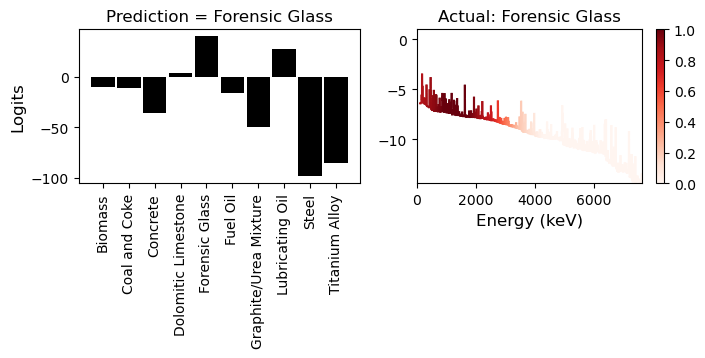

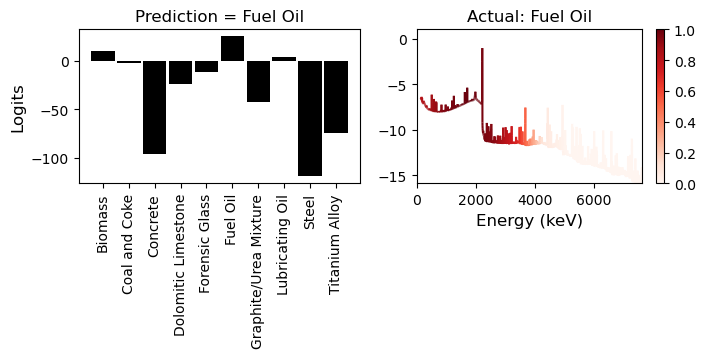

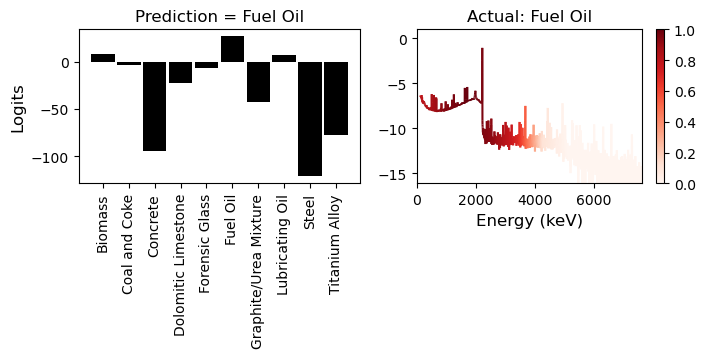

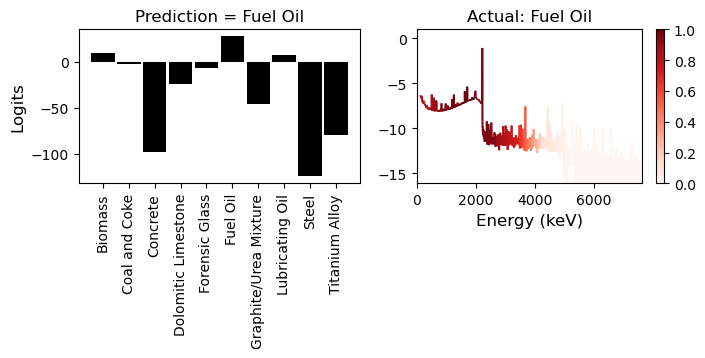

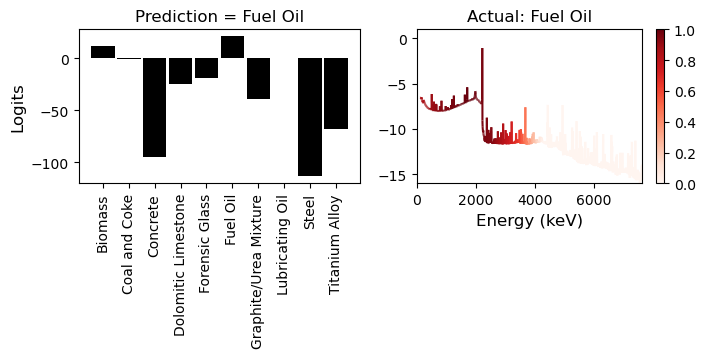

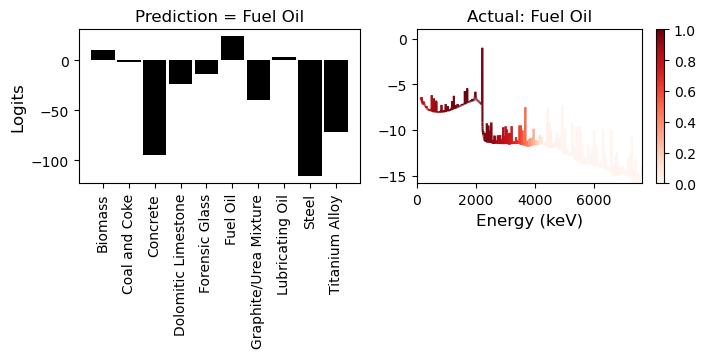

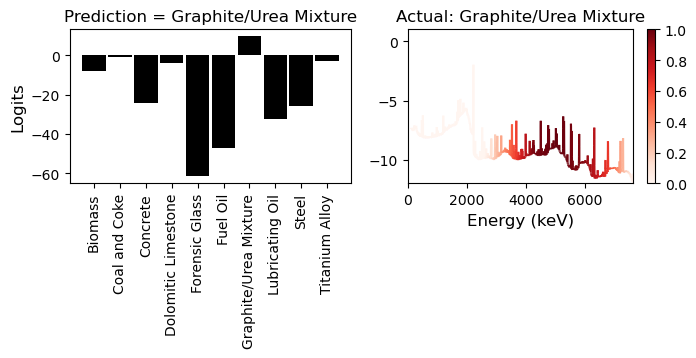

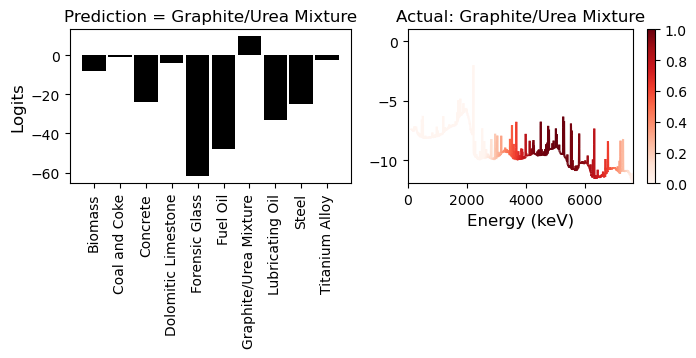

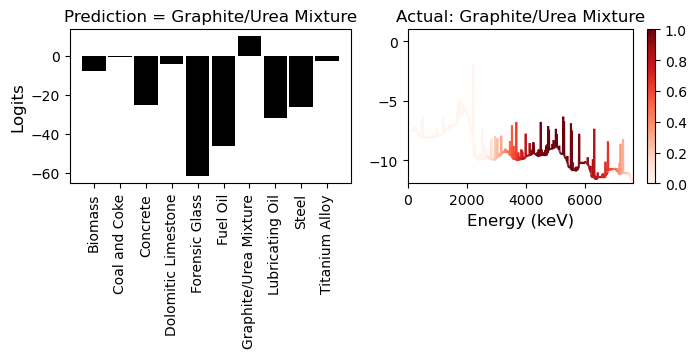

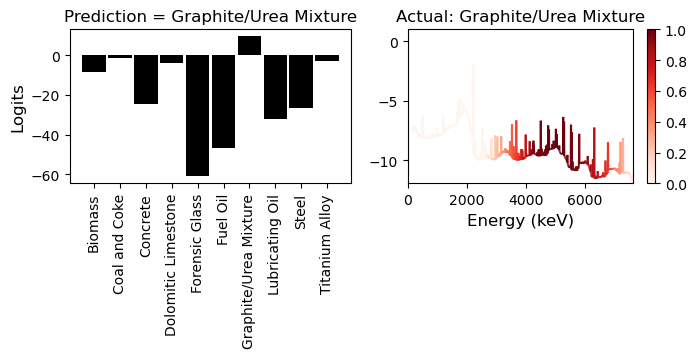

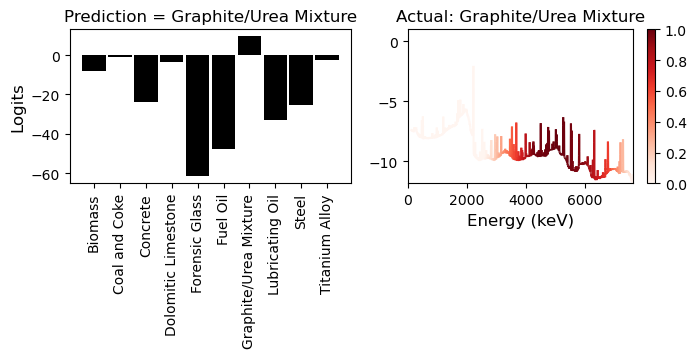

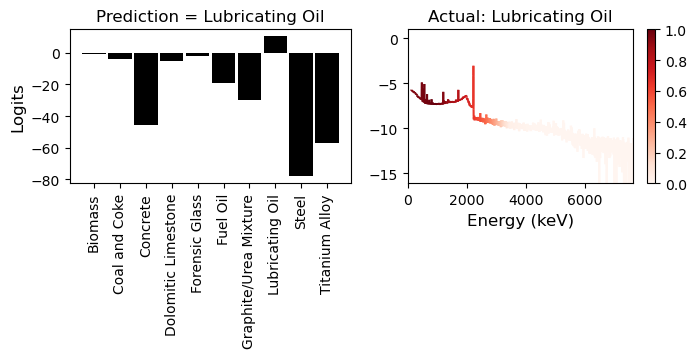

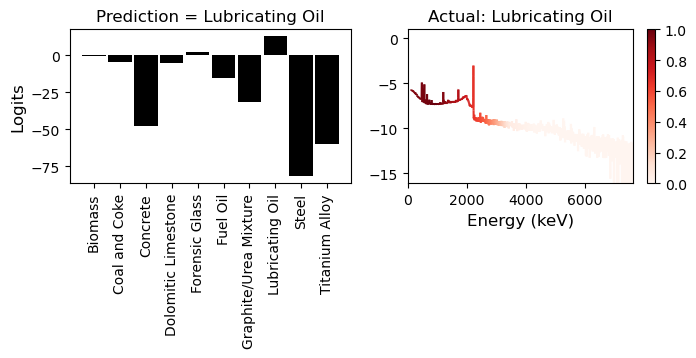

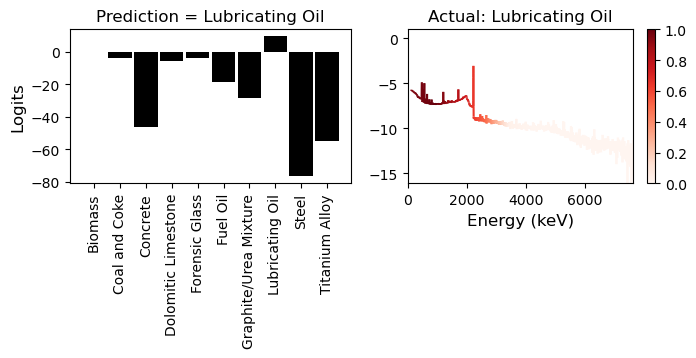

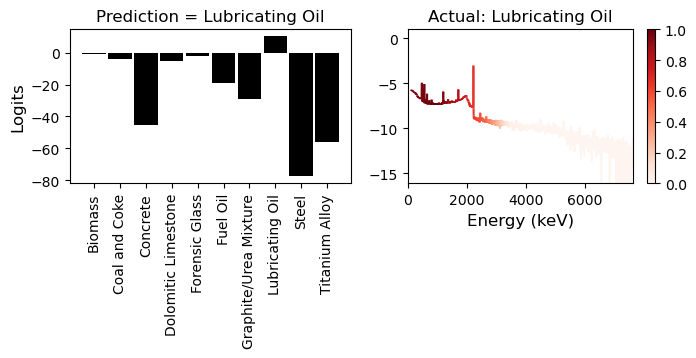

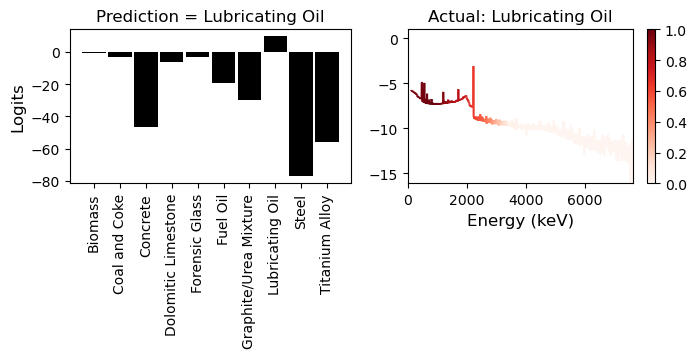

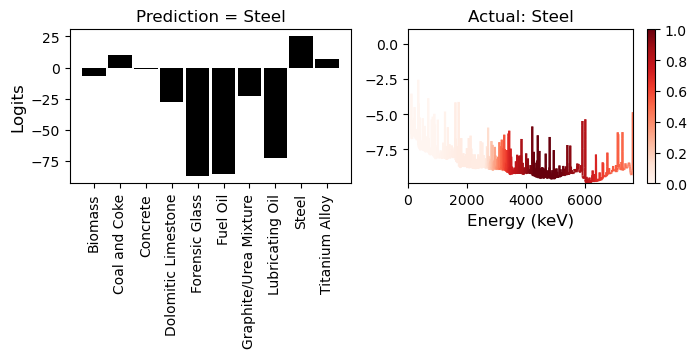

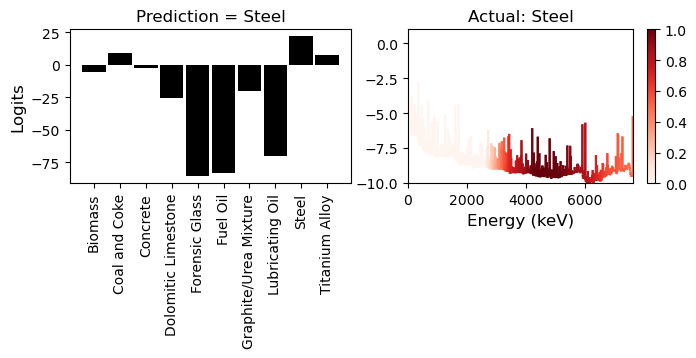

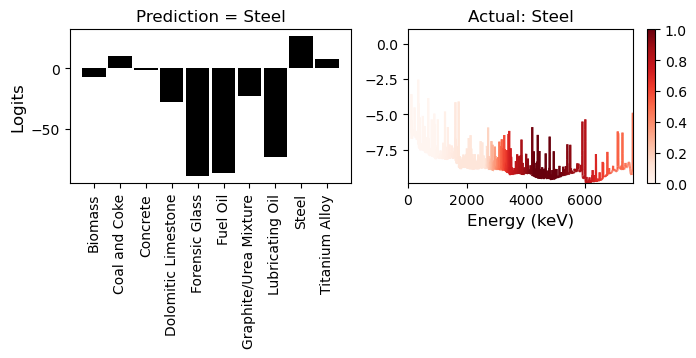

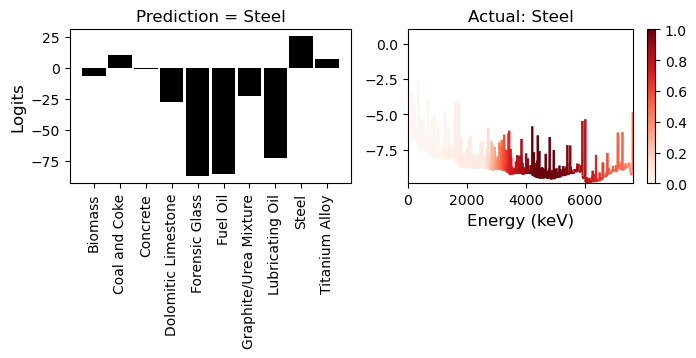

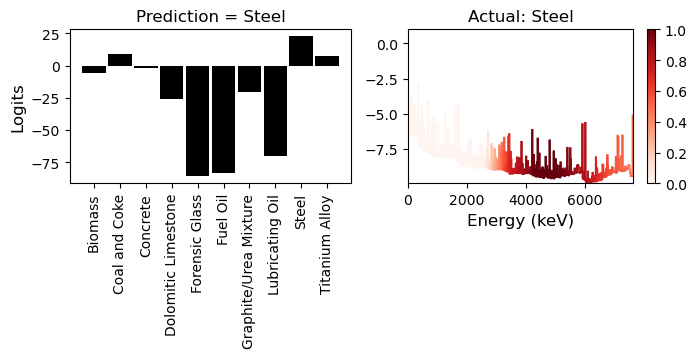

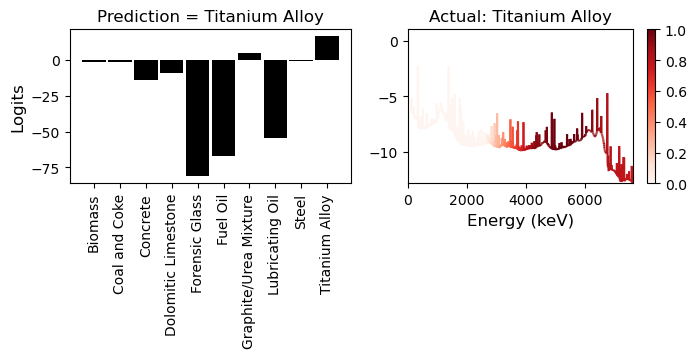

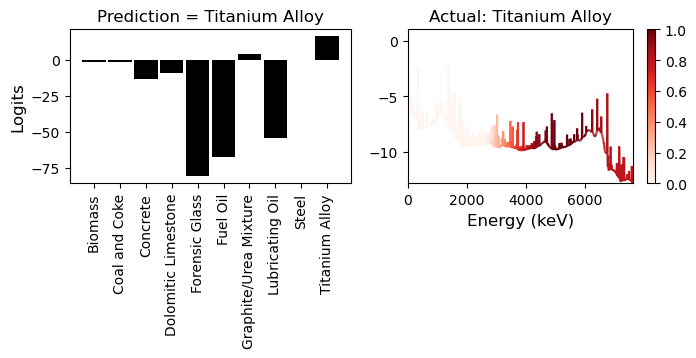

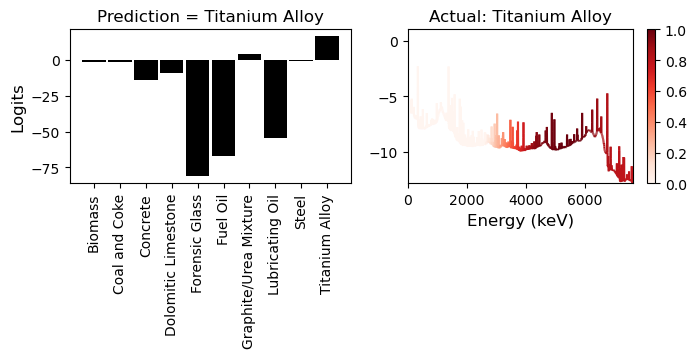

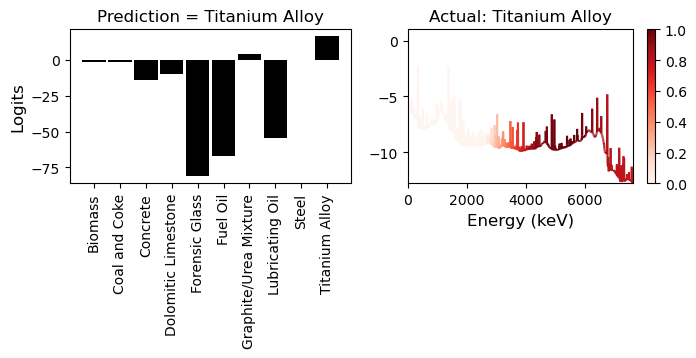

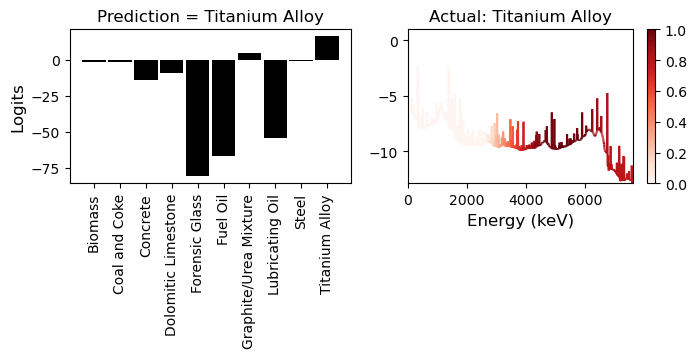

In [9]:
plot_example_explanations(
    model=model,
    plot_first=5, 
    enc=enc, 
    interp=True, 
    show_lines=False,
    fontsize=12,
)

# Model 3

In [10]:
model = keras.saving.load_model('./model3.keras')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2631, 1)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 329, 16)           272       
                                                                 
 conv1d_4 (Conv1D)           (None, 83, 16)            2064      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 20, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 32)            4128      
                                                                 
 conv1d_6 (Conv1D)           (None, 20, 32)            8224      
                                                           

/home/nam4/anaconda3/envs/pgaa-imaging/lib/python3.11/site-packages/pychemauth/analysis/explain.py:351: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(


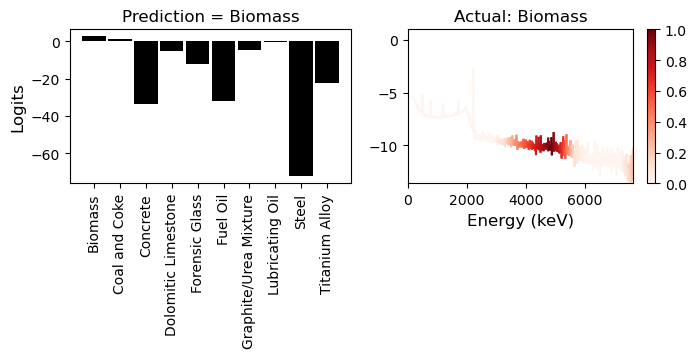

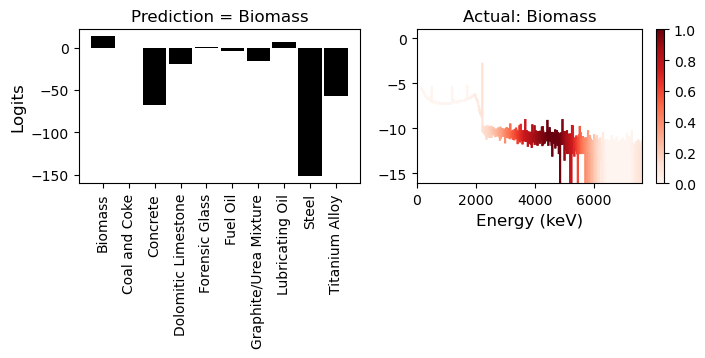

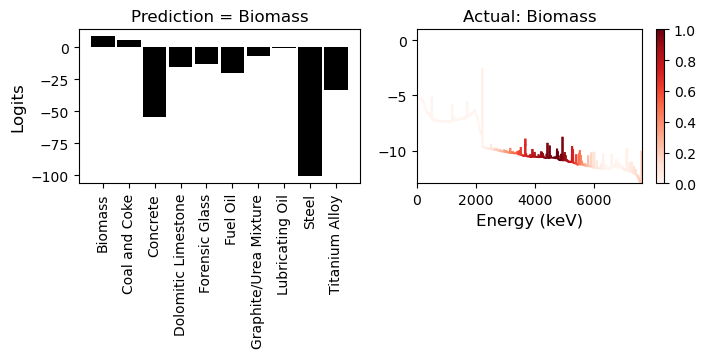

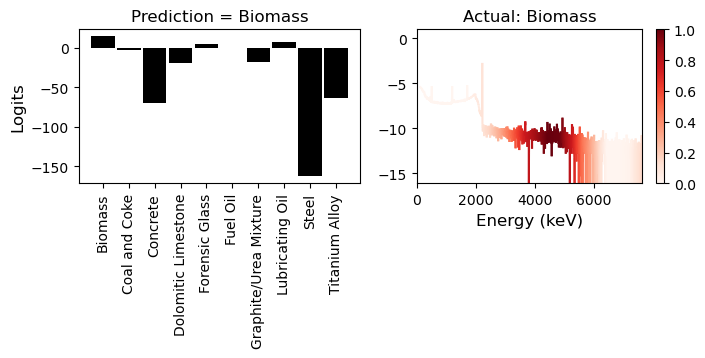

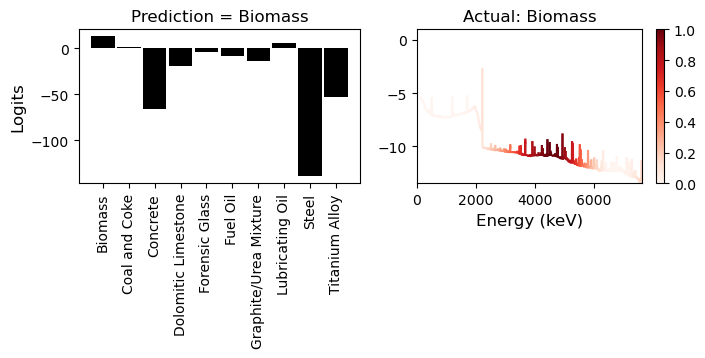

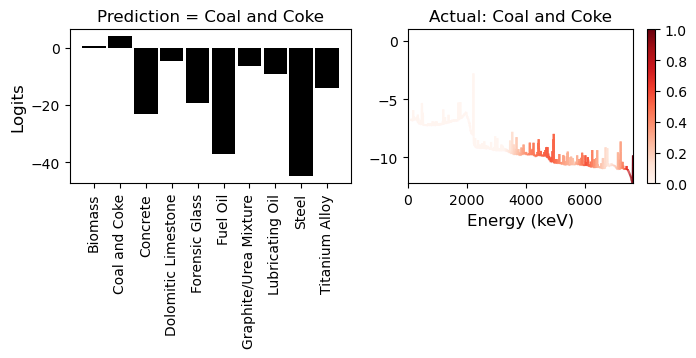

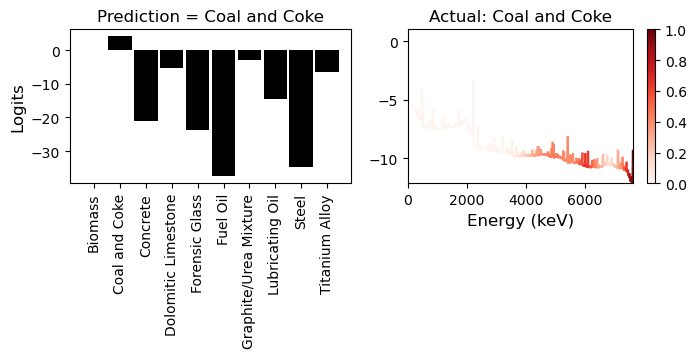

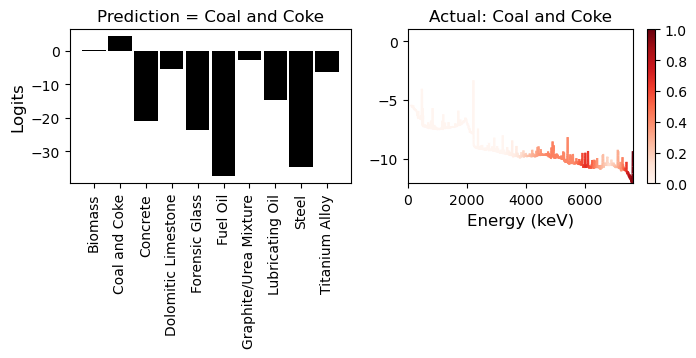

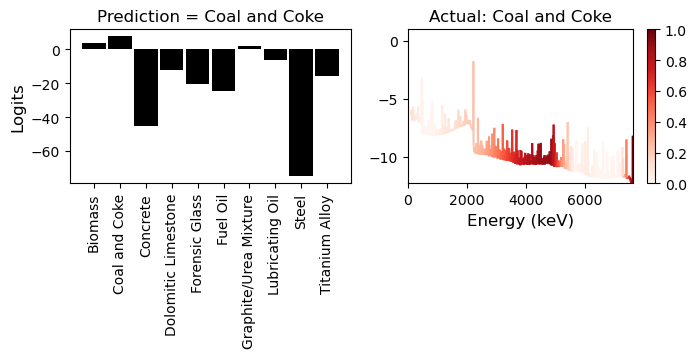

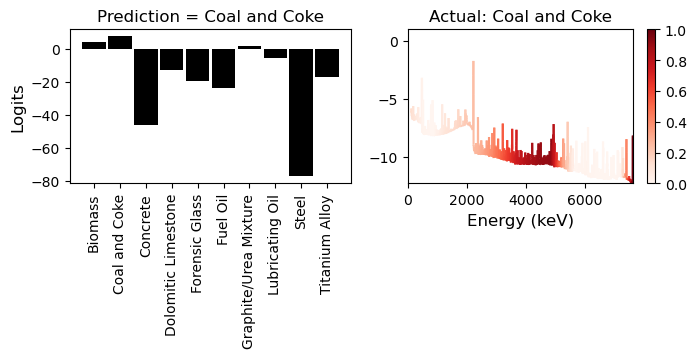

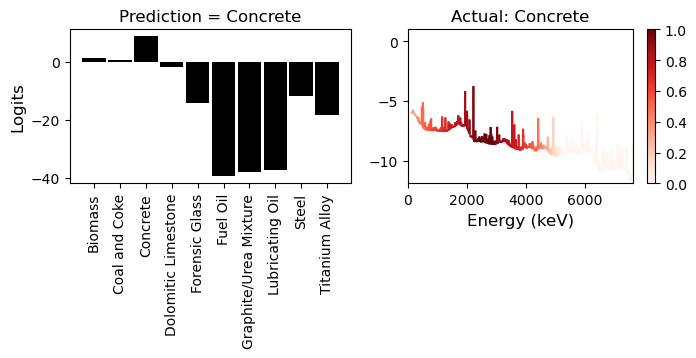

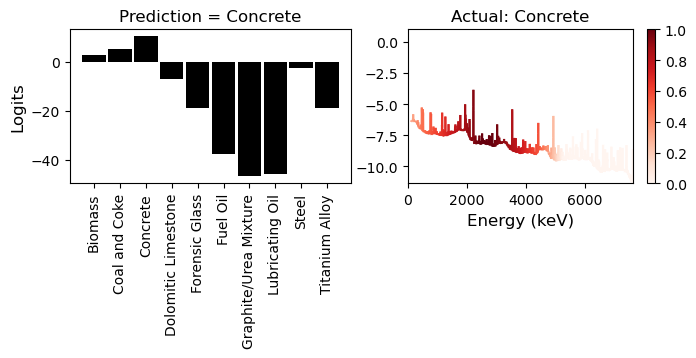

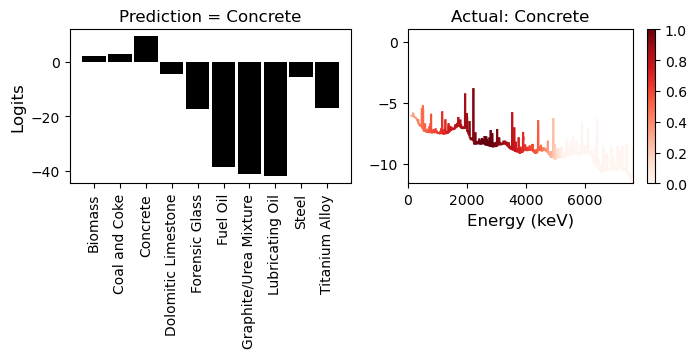

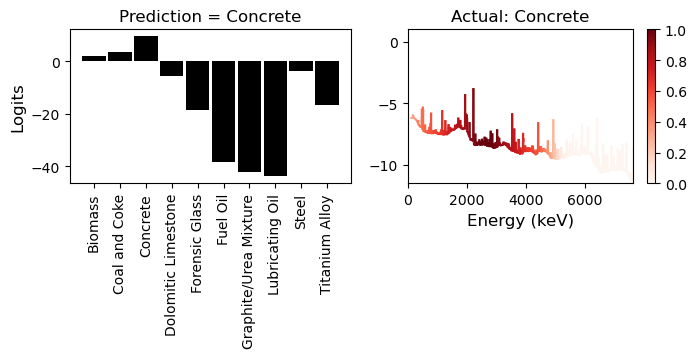

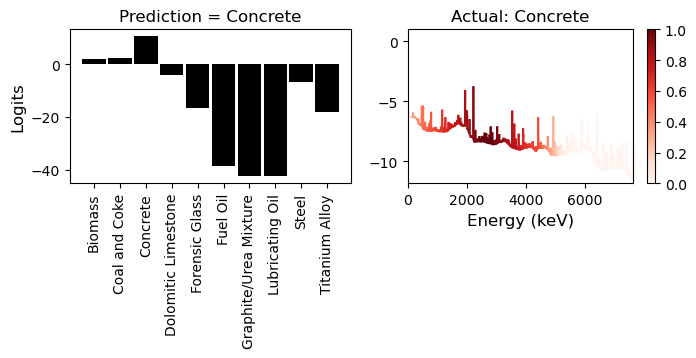

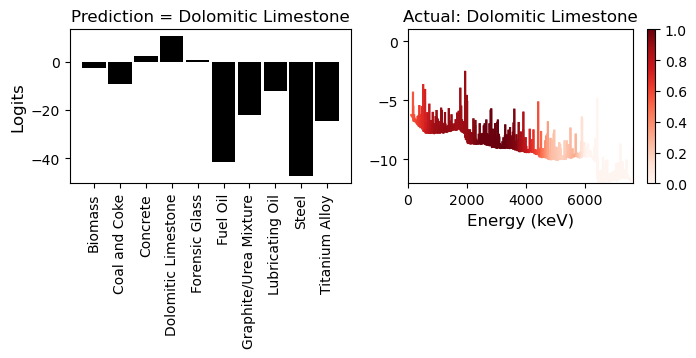

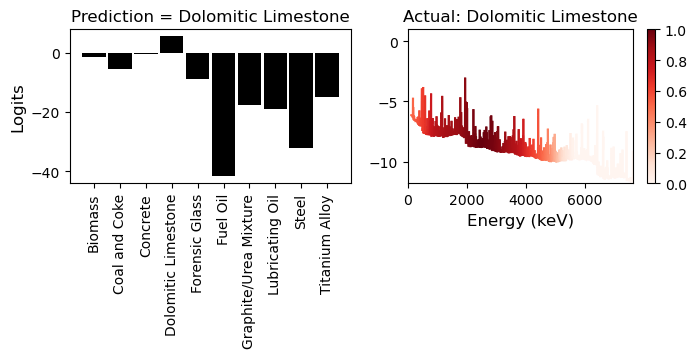

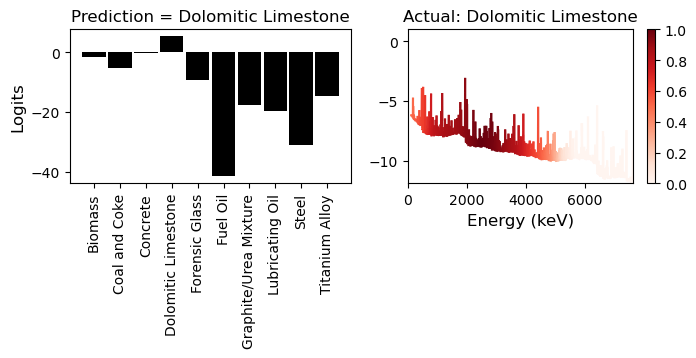

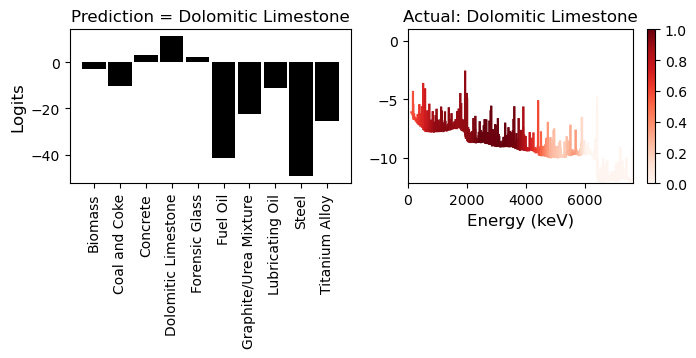

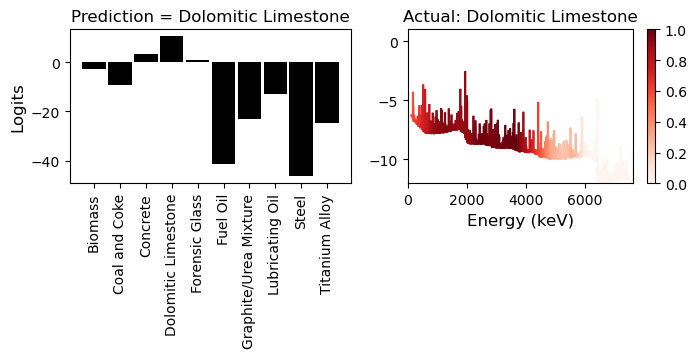

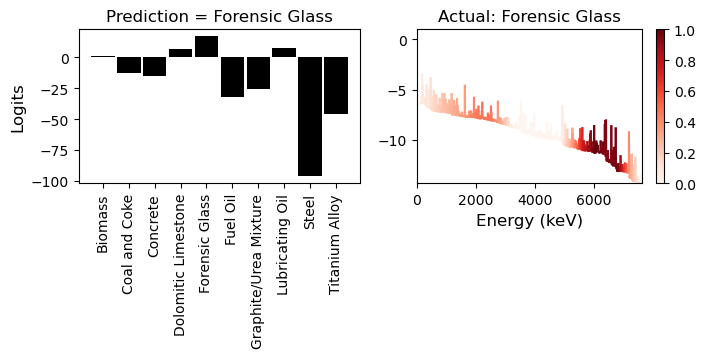

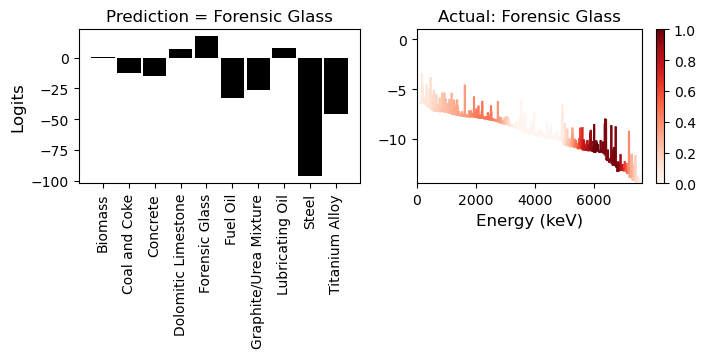

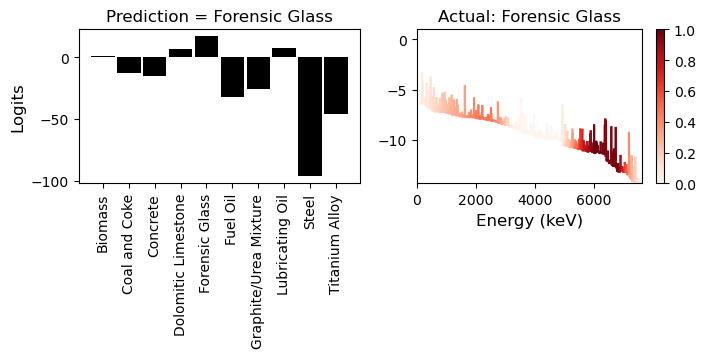

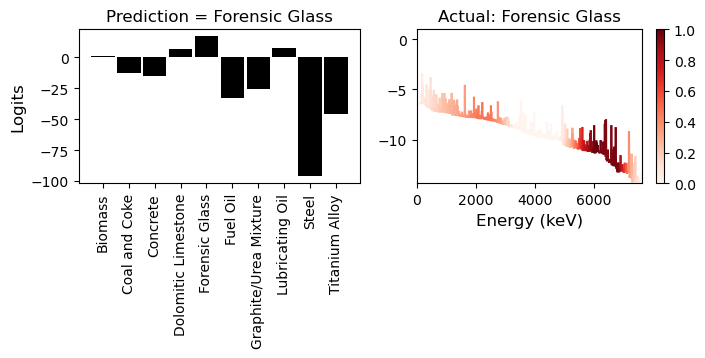

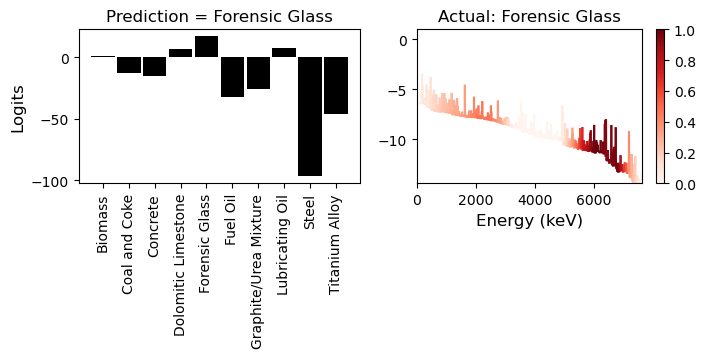

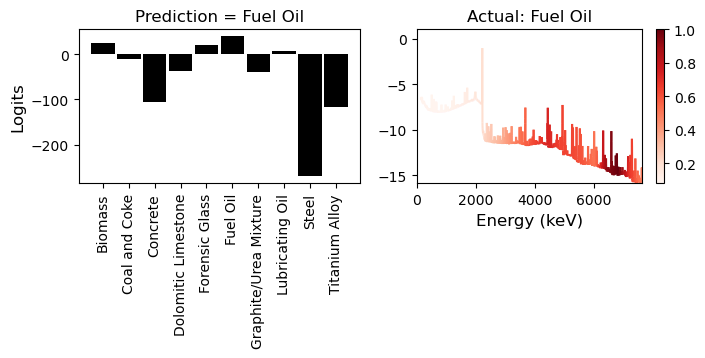

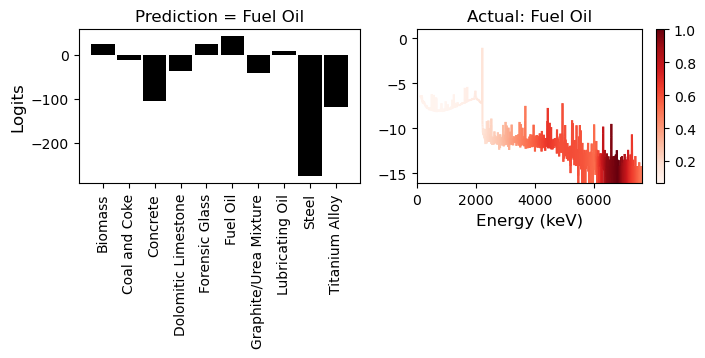

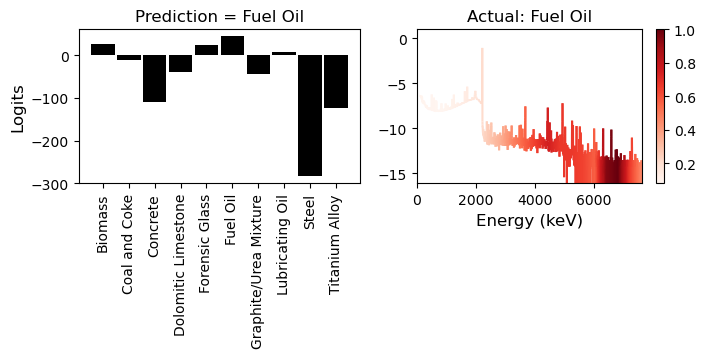

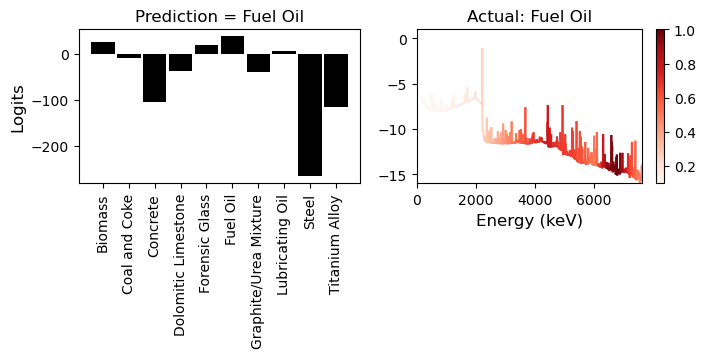

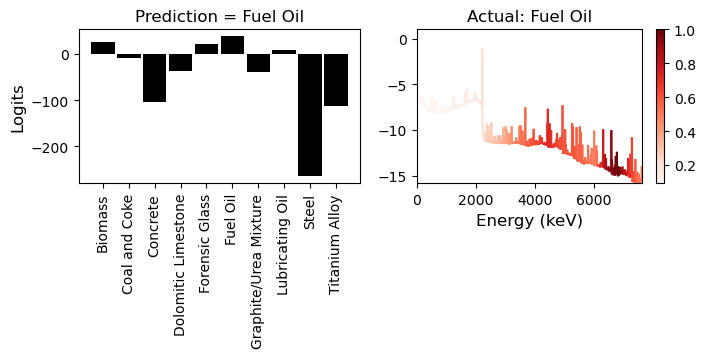

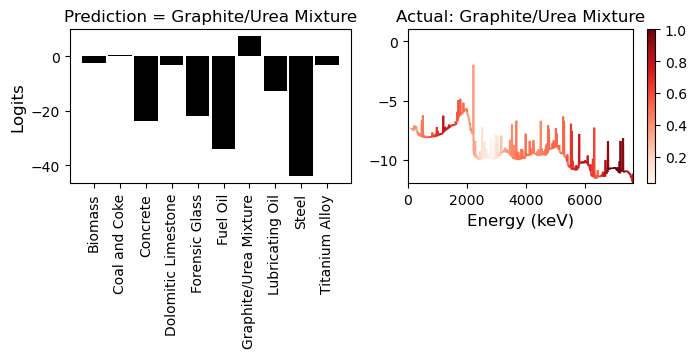

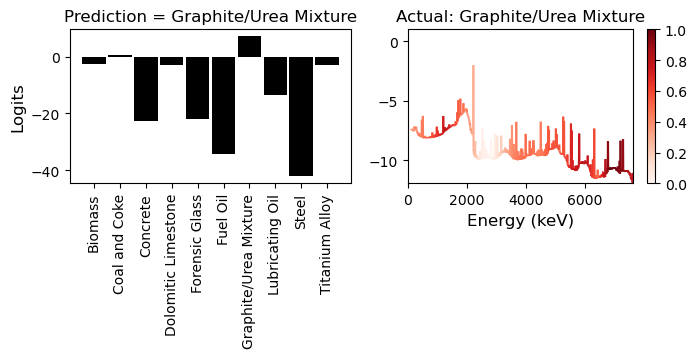

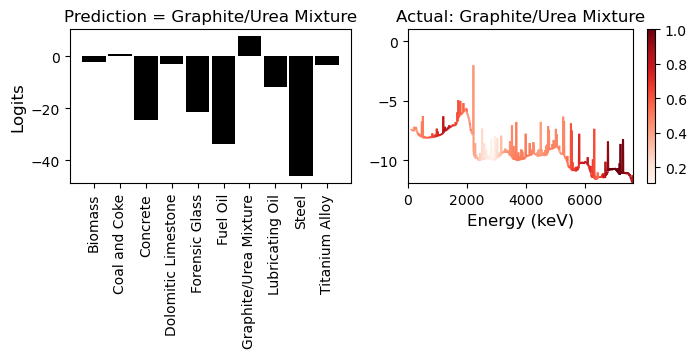

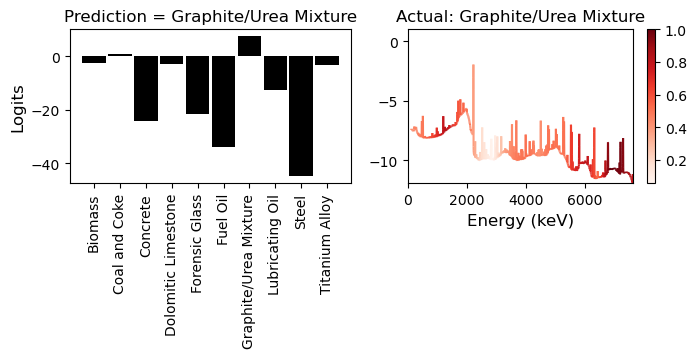

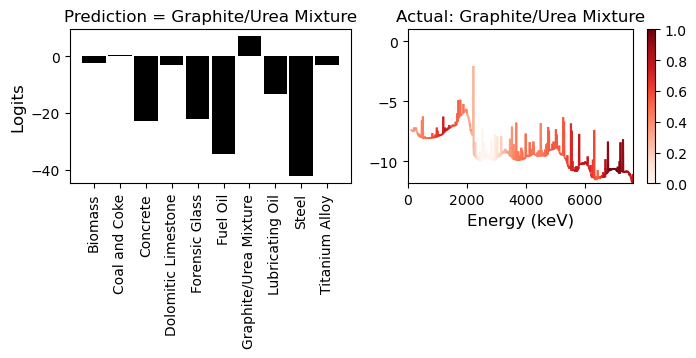

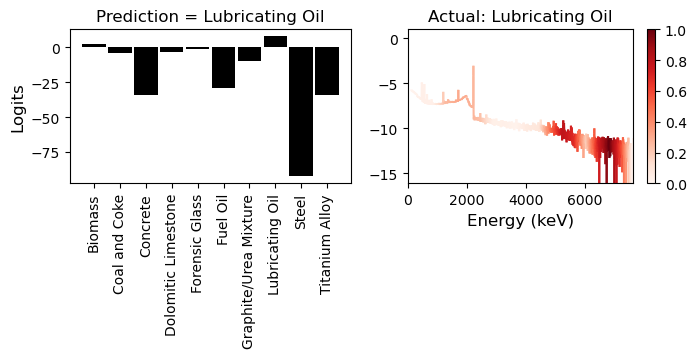

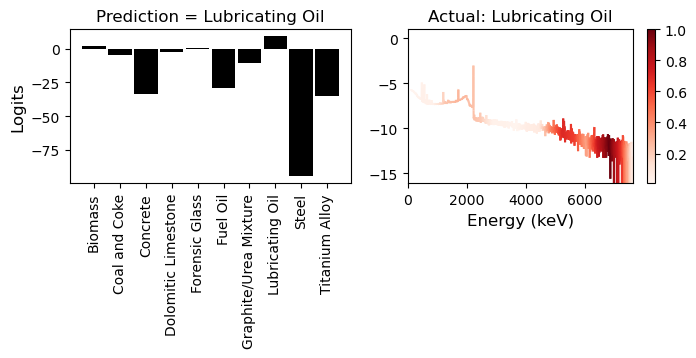

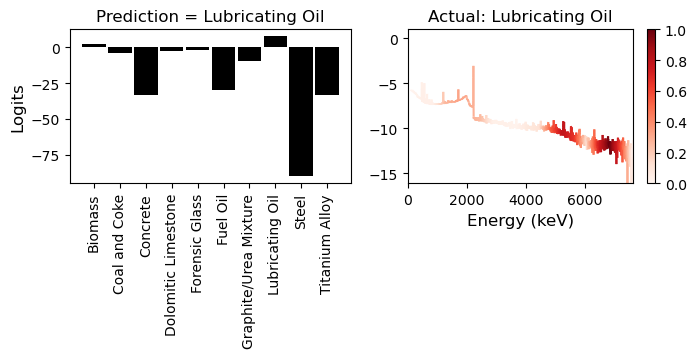

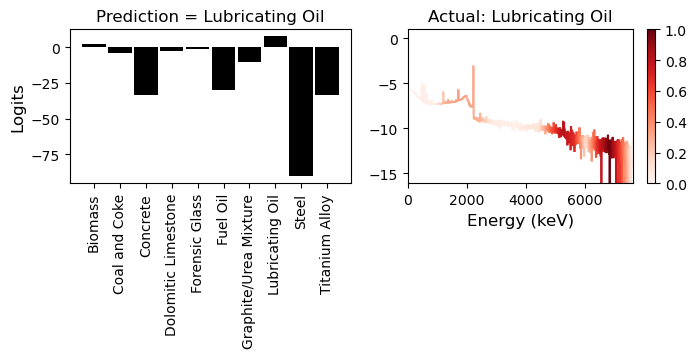

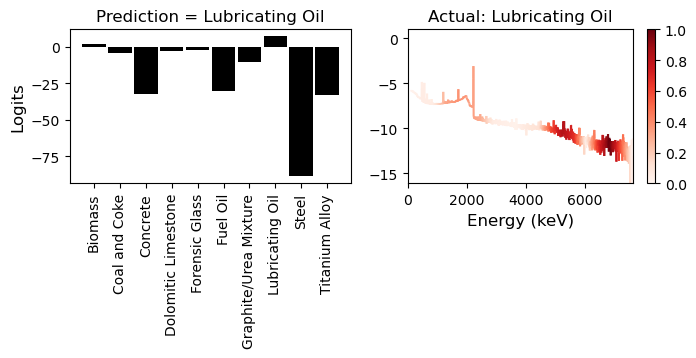

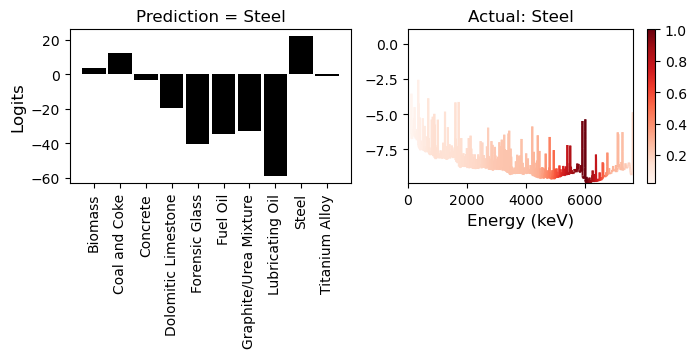

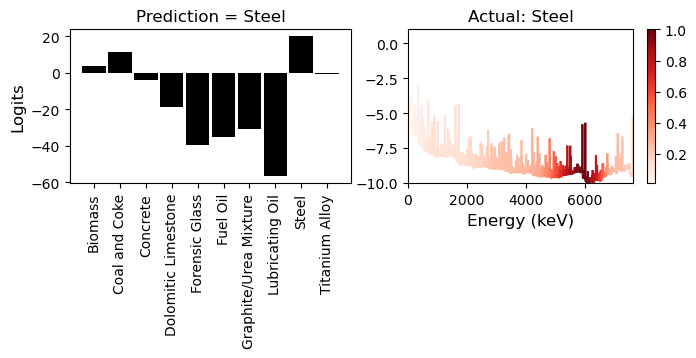

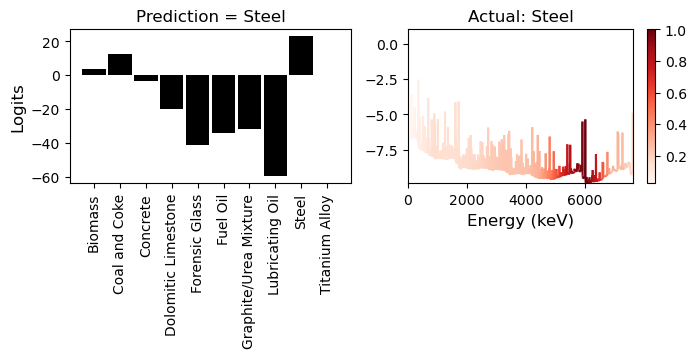

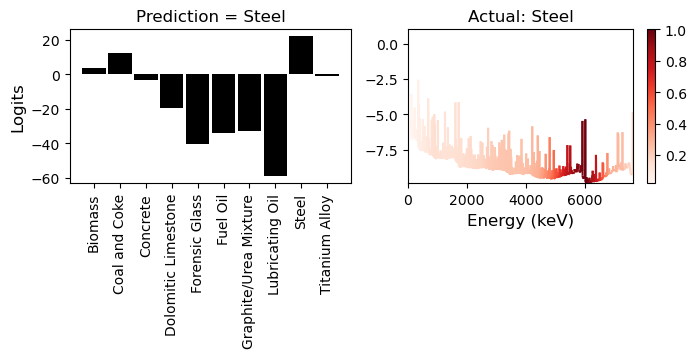

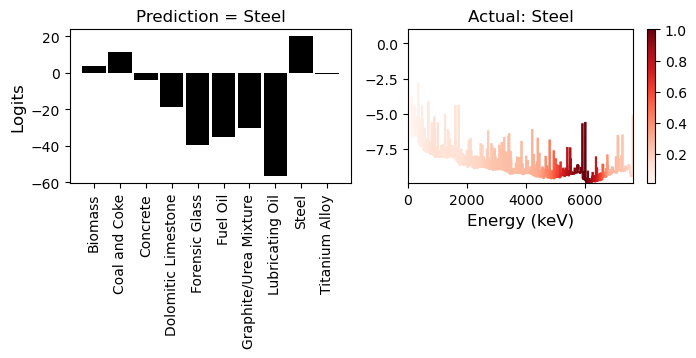

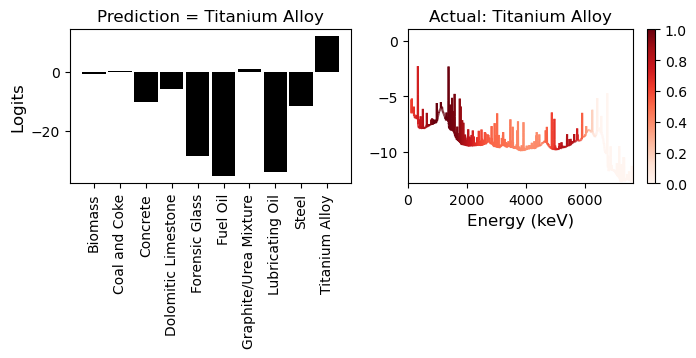

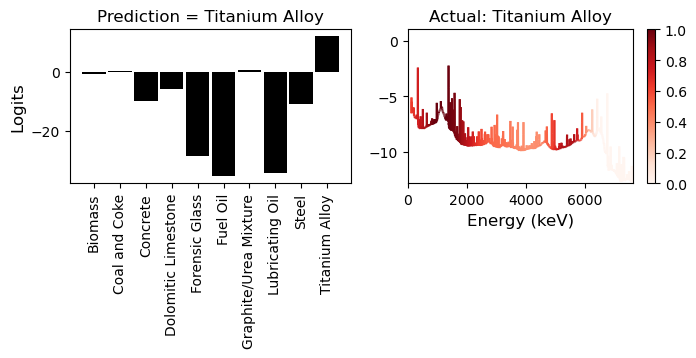

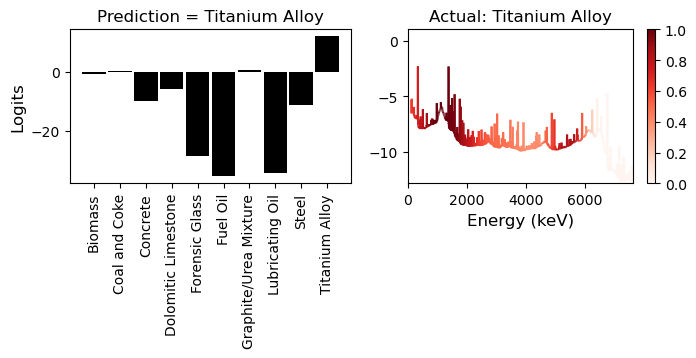

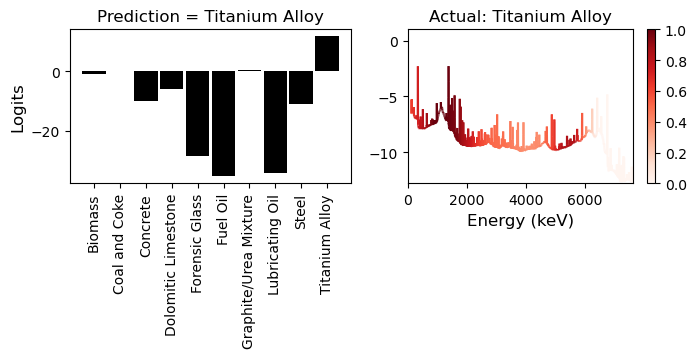

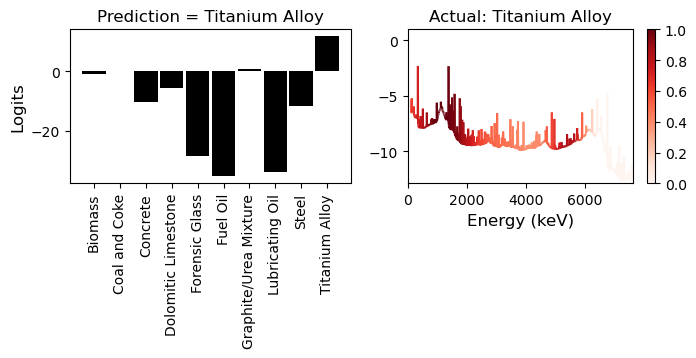

In [11]:
plot_example_explanations(
    model=model,
    plot_first=5, 
    enc=enc, 
    interp=True, 
    show_lines=False,
    fontsize=12,
)